In [10]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import xgboost as xgb
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_predict

In [3]:
def regressionMetrics(y, yhat):
    res = {
        'MSE': metrics.mean_squared_error(y, yhat),
        'RMSE': np.sqrt(metrics.mean_squared_error(y, yhat)),
        'MAE': metrics.mean_absolute_error(y, yhat),
        'R2': metrics.r2_score(y, yhat)
    }

    # Check if all values are > -1 to safely apply log
    if np.all(y > -1) and np.all(yhat > -1):
        rmsle = np.sqrt(metrics.mean_squared_log_error(y, yhat))
        res['RMSLE'] = rmsle
    else:
        res['RMSLE'] = 'Not applicable (values ≤ -1)'

    return res

In [1311]:
df = pd.read_pickle('data_for_model')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082 entries, 0 to 2081
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ds                   2082 non-null   datetime64[ns]
 1   SPY_return           2082 non-null   float64       
 2   SPY_Volume           2082 non-null   float64       
 3   AAPL                 2082 non-null   float64       
 4   MSFT                 2082 non-null   float64       
 5   GOOG                 2082 non-null   float64       
 6   GLD                  2082 non-null   float64       
 7   SLV                  2082 non-null   float64       
 8   ^TNX                 2082 non-null   float64       
 9   DX-Y.NYB             2082 non-null   float64       
 10  JPY=X                2082 non-null   float64       
 11  EUR=X                2082 non-null   float64       
 12  USO                  2082 non-null   float64       
 13  UNG                  2082 non-nul

In [ ]:
#df = df.iloc[:-10]

In [8]:
model_lst = pd.DataFrame()

In [1058]:
#df.info()
print(df.columns.to_list())

['ds', 'SPY_return', 'SPY_Volume', 'AAPL', 'MSFT', 'GOOG', 'GLD', 'SLV', '^TNX', 'DX-Y.NYB', 'JPY=X', 'EUR=X', 'USO', 'UNG', 'BTC-USD', 'CPER', '^VIX', '^GDAXI', '^FTSE', 'IWM', '^N225', 'IEI', '2Y_Yield', 'yield_curve', 'GLD/SLV', 'market_closed_count', 'yield_curve_term', 'high-low', 'before_high-low', 'SPY_Streak', 'SPY_AbsChange', 'day', 'month']


In [1089]:
y = df['SPY_return']
x = df.drop(['SPY_return', 'ds'], axis=1)


In [1057]:
print(x.columns.to_list())

['SPY_Volume', 'AAPL', 'MSFT', 'GOOG', 'GLD', 'SLV', '^TNX', 'DX-Y.NYB', 'JPY=X', 'EUR=X', 'USO', 'UNG', 'BTC-USD', 'CPER', '^VIX', '^GDAXI', '^FTSE', 'IWM', '^N225', 'IEI', '2Y_Yield', 'yield_curve', 'GLD/SLV', 'market_closed_count', 'yield_curve_term', 'high-low', 'before_high-low', 'SPY_Streak', 'SPY_AbsChange', 'day', 'month']


In [1030]:
x.info()
x.replace([np.inf, -np.inf], np.nan, inplace=True)
x.fillna(method='ffill', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SPY_Volume           1328 non-null   float64
 1   AAPL                 1328 non-null   float64
 2   MSFT                 1328 non-null   float64
 3   GOOG                 1328 non-null   float64
 4   GLD                  1328 non-null   float64
 5   SLV                  1328 non-null   float64
 6   ^TNX                 1328 non-null   float64
 7   DX-Y.NYB             1328 non-null   float64
 8   JPY=X                1328 non-null   float64
 9   EUR=X                1328 non-null   float64
 10  USO                  1328 non-null   float64
 11  UNG                  1328 non-null   float64
 12  BTC-USD              1328 non-null   float64
 13  CPER                 1328 non-null   float64
 14  ^VIX                 1328 non-null   float64
 15  ^GDAXI               1328 non-null   f

C:\Users\OMER\AppData\Local\Temp\ipykernel_20628\3916448056.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x.fillna(method='ffill', inplace=True)


In [1090]:
split = int(len(y)*0.9)
x_train = x.iloc[:split]
x_test = x.iloc[split:]
y_train = y.iloc[:split]
y_test = y.iloc[split:]

In [887]:
df[['ds','SPY_return']].tail(20)

,ds,SPY_return
1309,2025-03-20,-0.289173
1310,2025-03-21,0.032986
1311,2025-03-24,1.790850
1312,2025-03-25,0.240385
1313,2025-03-26,-1.193827
1314,2025-03-27,-0.265571
1315,2025-03-28,-2.013833
1316,2025-03-31,0.671281
1317,2025-04-01,0.282443
1318,2025-04-02,0.632841


In [1044]:
# Find rows with inf or -inf
mask_inf = x_train.isin([np.inf, -np.inf])
rows_with_inf = x_train[mask_inf.any(axis=1)]
print("Rows with inf/-inf:")
print(rows_with_inf)

Rows with inf/-inf:
Empty DataFrame
Columns: [SPY_Volume, AAPL, MSFT, GOOG, GLD, SLV, ^TNX, DX-Y.NYB, JPY=X, EUR=X, USO, UNG, BTC-USD, CPER, ^VIX, ^GDAXI, ^FTSE, IWM, ^N225, IEI, 2Y_Yield, yield_curve, GLD/SLV, market_closed_count, yield_curve_term, high-low, before_high-low, SPY_Streak, SPY_AbsChange, day, month]
Index: []

[0 rows x 31 columns]


In [1091]:
model_rf = RandomForestRegressor(n_jobs=-1)
model_rf.fit(x_train, y_train)


RandomForestRegressor(n_jobs=-1)

{'MSE': 0.08767939637511704,
 'RMSE': np.float64(0.29610706910696516),
 'MAE': 0.23566606717325952,
 'R2': 0.890556769468303,
 'RMSLE': 'Not applicable (values ≤ -1)'}

In [1092]:
predicted_rf = model_rf.predict(x_test)
regressionMetrics(y_test,predicted_rf)

{'MSE': 0.2172116927766538,
 'RMSE': np.float64(0.4660597523672837),
 'MAE': 0.28408421842156,
 'R2': 0.904253976724058,
 'RMSLE': 'Not applicable (values ≤ -1)'}

In [146]:
model_dict = {'model': 'regular random foresrt'}
new_row = pd.DataFrame([{**model_dict , **regressionMetrics(y_test,predicted_rf)}])
model_lst = pd.concat([model_lst, new_row], ignore_index=True)
model_lst

,model,MSE,RMSE,MAE,R2,RMSLE
0,regular random foresrt,0.087679,0.296107,0.235666,0.890557,Not applicable (values ≤ -1)


In [50]:
check_df = pd.concat([y_test, pd.Series(predicted_rf, index=y_test.index)], axis=1)
check_df.columns = ['Actual', 'Predicted']  # Optional: name the columns
check_df.tail(20)


,Actual,Predicted
1297,-1.751995,-1.788422
1298,-1.183686,-0.471390
1299,1.074783,1.009589
1300,-1.775109,-0.915461
1301,0.560483,0.249145
1302,-2.663556,-2.433971
1303,-0.831288,-0.144734
1304,0.530654,0.524703
1305,-1.333050,-1.211153
1306,2.065575,1.820713


<Axes: xlabel='Actual', ylabel='Predicted'>

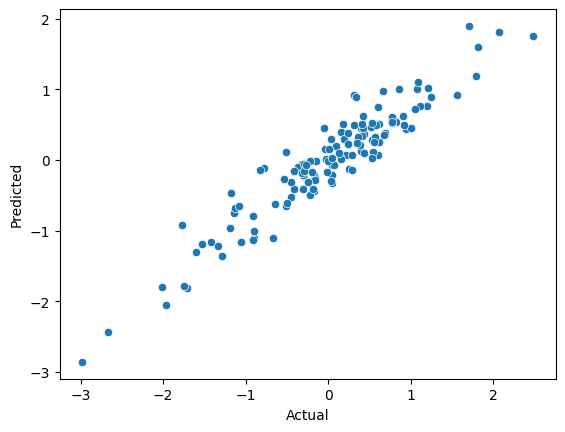

In [81]:
import seaborn as sns
sns.scatterplot(x=check_df['Actual'], y=check_df['Predicted'])

In [793]:
check_df['price_actual'] = 300 * (1 + check_df['Actual'] / 100).cumprod()
check_df['price_predicted'] = 300 * (1 + check_df['Predicted'] / 100).cumprod()


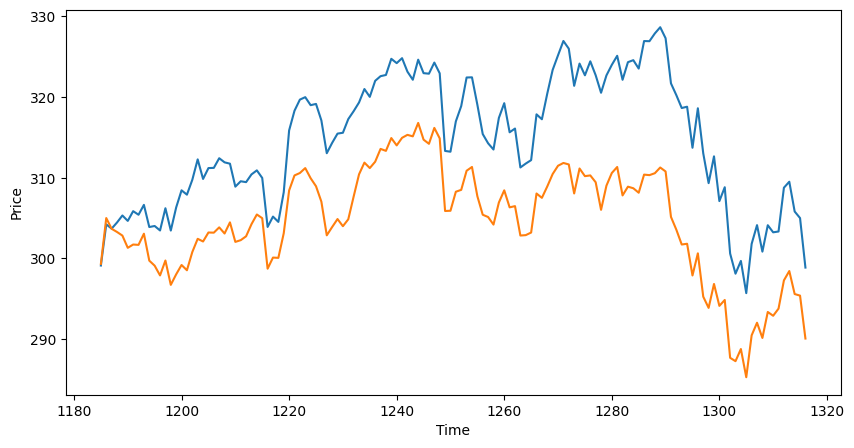

In [794]:
plt.figure(figsize=(10, 5))
plt.plot(check_df['price_actual'], label='Actual Price')
plt.plot(check_df['price_predicted'], label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

## With cross validation
No cross validation is better

In [51]:
check_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 1185 to 1316
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     132 non-null    float64
 1   Predicted  132 non-null    float64
dtypes: float64(2)
memory usage: 3.1 KB


In [52]:
model_cv_rf = RandomForestRegressor(n_jobs=-1)
pred_cv = cross_val_predict(model_cv_rf,x_test,y_test,cv=5)

In [53]:
regressionMetrics(y_test,pred_cv)

{'MSE': 0.15851195566023693,
 'RMSE': np.float64(0.3981355995891813),
 'MAE': 0.2999673545269994,
 'R2': 0.8021421083793325,
 'RMSLE': 'Not applicable (values ≤ -1)'}

# XGBoost

In [72]:
xg = xgb.XGBRegressor(n_jobs =-1 )
xg.fit(x_train, y_train)
predicted_xg = xg.predict(x_test)
regressionMetrics(y_test,predicted_xg)

{'MSE': 0.1158479476165803,
 'RMSE': np.float64(0.34036443353643797),
 'MAE': 0.2750705860894714,
 'R2': 0.8553962029644683,
 'RMSLE': 'Not applicable (values ≤ -1)'}

In [147]:
model_dict = {'model': 'regular xgboost'}
new_row = pd.DataFrame([{**model_dict , **regressionMetrics(y_test,predicted_xg)}])
model_lst = pd.concat([model_lst, new_row], ignore_index=True)
model_lst

,model,MSE,RMSE,MAE,R2,RMSLE
0,regular random foresrt,0.087679,0.296107,0.235666,0.890557,Not applicable (values ≤ -1)
1,regular xgboost,0.115848,0.340364,0.275071,0.855396,Not applicable (values ≤ -1)


# Add events 

In [1312]:
#df['ds'].head()
event = pd.read_pickle('SPY_with_events.pkl')
#event = pd.read_csv('cpi_release_dates_2020_2025.csv')
event.head(20)

,ds,SPY_Close,SPY_Volume,month,day,Actual_GDP,Actual_nonfarm,Actual_CPI,Actual_PPI,Actual_unemployment rate,...,nonfarm_vs_previous,unemployment rate_vs_forecast,unemployment rate_vs_previous,core_PCE_vs_forecast,core_PCE_vs_previous,FOMC_vs_forecast,FOMC_vs_previous,is_event,days_since_fomc,isr_holiday
0,2017-01-03,196.697174,91366500,1,3,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,2017-01-04,197.867355,78744400,1,4,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,2017-01-05,197.710129,78379000,1,5,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,2017-01-06,198.417511,71559900,1,6,none event,156K,none event,none event,0.047,...,-1.0,0.0,1.0,NaN,NaN,NaN,NaN,1,NaN,0
4,2017-01-09,197.762558,46939700,1,9,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
5,2017-01-10,197.762558,63771900,1,10,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
6,2017-01-11,198.321457,74650000,1,11,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
7,2017-01-12,197.823685,72113200,1,12,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
8,2017-01-13,198.277817,62717900,1,13,none event,none event,none event,0.016,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0
9,2017-01-17,197.579163,61240800,1,17,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [797]:
event['is_event'].head(20)

0     0
1     0
2     0
3     0
4     0
5     1
6     0
7     1
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    1
19    1
Name: is_event, dtype: int64

# Add column for the name of the event

In [1313]:
lst_cols =['Actual_GDP','Actual_nonfarm','Actual_CPI','Actual_PPI','Actual_unemployment rate','Actual_core_PCE','Actual_FOMC']
def identify_events(row):
    events = [col for col in lst_cols if row[col] != 'none event']
    return ', '.join(events) if events else np.nan

event['event'] = event.apply(identify_events, axis=1)

event['event'].head(20)

0                                          NaN
1                                          NaN
2                                          NaN
3     Actual_nonfarm, Actual_unemployment rate
4                                          NaN
5                                          NaN
6                                          NaN
7                                          NaN
8                                   Actual_PPI
9                                          NaN
10                                  Actual_CPI
11                                         NaN
12                                         NaN
13                                         NaN
14                                         NaN
15                                         NaN
16                                         NaN
17                                  Actual_GDP
18                             Actual_core_PCE
19                                         NaN
Name: event, dtype: object

In [1314]:
event['event'] = event['event'].astype('category')
event['event'] = event['event'].cat.codes
event['event'].head(20)

0    -1
1    -1
2    -1
3     9
4    -1
5    -1
6    -1
7    -1
8     6
9    -1
10    0
11   -1
12   -1
13   -1
14   -1
15   -1
16   -1
17    3
18    8
19   -1
Name: event, dtype: int8

In [1315]:
# DATE TO ds
event=  event.rename(columns={'Date':'ds'})
event['ds'] = pd.to_datetime(event['ds'],format='%Y-%m-%d')

In [1317]:
event_ = event.drop(['SPY_Close','SPY_Volume','month','day'],axis=1)
event_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             2086 non-null   datetime64[ns]
 1   Actual_GDP                     2086 non-null   object        
 2   Actual_nonfarm                 2086 non-null   object        
 3   Actual_CPI                     2086 non-null   object        
 4   Actual_PPI                     2086 non-null   object        
 5   Actual_unemployment rate       2086 non-null   object        
 6   Actual_core_PCE                2086 non-null   object        
 7   Actual_FOMC                    2086 non-null   object        
 8   CPI_vs_forecast                97 non-null     float64       
 9   CPI_vs_previous                97 non-null     float64       
 10  GDP_vs_forecast                98 non-null     float64       
 11  GDP_vs_previous  

In [1318]:
def convert_k_to_number(val):
    if isinstance(val, str) and 'k' in val.lower():
        try:
            return float(val.lower().replace('k', '')) * 1000
        except:
            return val
    return val  # return as-is if already numeric or not a string

event_['Actual_nonfarm'] = event_['Actual_nonfarm'].apply(convert_k_to_number)
event_['Actual_nonfarm'] = pd.to_numeric(event_['Actual_nonfarm'], errors='coerce')

event_.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             2086 non-null   datetime64[ns]
 1   Actual_GDP                     2086 non-null   object        
 2   Actual_nonfarm                 93 non-null     float64       
 3   Actual_CPI                     2086 non-null   object        
 4   Actual_PPI                     2086 non-null   object        
 5   Actual_unemployment rate       2086 non-null   object        
 6   Actual_core_PCE                2086 non-null   object        
 7   Actual_FOMC                    2086 non-null   object        
 8   CPI_vs_forecast                97 non-null     float64       
 9   CPI_vs_previous                97 non-null     float64       
 10  GDP_vs_forecast                98 non-null     float64       
 11  GDP_vs_previous  

In [1319]:
event_['Actual_nonfarm'].fillna('none event', inplace=True)
event_['Actual_nonfarm'].head(20)

C:\Users\OMER\AppData\Local\Temp\ipykernel_20628\3214170230.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  event_['Actual_nonfarm'].fillna('none event', inplace=True)
C:\Users\OMER\AppData\Local\Temp\ipykernel_20628\3214170230.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'none event' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  event_['Actual_nonfarm'].fillna('none event', inplace=True)


0     none event
1     none event
2     none event
3       156000.0
4     none event
5     none event
6     none event
7     none event
8     none event
9     none event
10    none event
11    none event
12    none event
13    none event
14    none event
15    none event
16    none event
17    none event
18    none event
19    none event
Name: Actual_nonfarm, dtype: object

In [1320]:
event_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             2086 non-null   datetime64[ns]
 1   Actual_GDP                     2086 non-null   object        
 2   Actual_nonfarm                 2086 non-null   object        
 3   Actual_CPI                     2086 non-null   object        
 4   Actual_PPI                     2086 non-null   object        
 5   Actual_unemployment rate       2086 non-null   object        
 6   Actual_core_PCE                2086 non-null   object        
 7   Actual_FOMC                    2086 non-null   object        
 8   CPI_vs_forecast                97 non-null     float64       
 9   CPI_vs_previous                97 non-null     float64       
 10  GDP_vs_forecast                98 non-null     float64       
 11  GDP_vs_previous  

In [ ]:
#for col in event_.select_dtypes('object').columns:
    #event_[col] = pd.to_numeric(event_[col], errors='coerce')

#event_.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             1325 non-null   datetime64[ns]
 1   Actual_GDP                     63 non-null     float64       
 2   Actual_nonfarm                 57 non-null     float64       
 3   Actual_CPI                     62 non-null     float64       
 4   Actual_PPI                     63 non-null     float64       
 5   Actual_unemployment rate       62 non-null     float64       
 6   Actual_core_PCE                62 non-null     float64       
 7   Actual_FOMC                    43 non-null     float64       
 8   CPI_vs_forecast                62 non-null     float64       
 9   CPI_vs_previous                62 non-null     float64       
 10  GDP_vs_forecast                63 non-null     float64       
 11  GDP_vs_previous  

# Handle nulls
I will try few approches

# This is the best method

In [1418]:
#1 : nuls = -10 & none event =-10
event_1 = event_.copy()
#for col in event_1.select_dtypes('object').columns:
    #event_1[col] = pd.to_numeric(event_1[col], errors='coerce')
event_1 = event_1.fillna(-5)
lst_col = ['Actual_GDP','Actual_nonfarm','Actual_CPI','Actual_PPI','Actual_unemployment rate','Actual_core_PCE','Actual_FOMC']
for col in lst_col:
    event_1[col] = event_1[col].replace('none event',-5)

event_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             2086 non-null   datetime64[ns]
 1   Actual_GDP                     2086 non-null   float64       
 2   Actual_nonfarm                 2086 non-null   float64       
 3   Actual_CPI                     2086 non-null   float64       
 4   Actual_PPI                     2086 non-null   float64       
 5   Actual_unemployment rate       2086 non-null   float64       
 6   Actual_core_PCE                2086 non-null   float64       
 7   Actual_FOMC                    2086 non-null   float64       
 8   CPI_vs_forecast                2086 non-null   float64       
 9   CPI_vs_previous                2086 non-null   float64       
 10  GDP_vs_forecast                2086 non-null   float64       
 11  GDP_vs_previous  

C:\Users\OMER\AppData\Local\Temp\ipykernel_20628\113293629.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  event_1[col] = event_1[col].replace('none event',-5)


In [1400]:
event_1 = event_1[['ds','event','is_event','isr_holiday']]

In [ ]:
#2 : nulls =-10 & forward fill for the nonde event
event_2 = event_.copy()
event_2 = event_2.fillna(-10)
for col in lst_col:
    event_2[col] = event_2[col].replace('none event', np.nan)  # convert to NaN first
    event_2[col] = pd.to_numeric(event_2[col], errors='coerce')  # make sure all values are numeric
    event_2[col] = event_2[col].ffill()  # forward-fill the last known value

event_2 = event_2.dropna()
event_2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1305 entries, 20 to 1324
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             1305 non-null   datetime64[ns]
 1   Actual_GDP                     1305 non-null   float64       
 2   Actual_nonfarm                 1305 non-null   float64       
 3   Actual_CPI                     1305 non-null   float64       
 4   Actual_PPI                     1305 non-null   float64       
 5   Actual_unemployment rate       1305 non-null   float64       
 6   Actual_core_PCE                1305 non-null   float64       
 7   Actual_FOMC                    1305 non-null   float64       
 8   CPI_vs_forecast                1305 non-null   float64       
 9   CPI_vs_previous                1305 non-null   float64       
 10  GDP_vs_forecast                1305 non-null   float64       
 11  GDP_vs_previous      

C:\Users\OMER\AppData\Local\Temp\ipykernel_20628\582652171.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  event_2[col] = event_2[col].replace('none event', np.nan)  # convert to NaN first


In [1108]:
#3: both forward fill
event_3 = event_.copy()
event_3 = event_3.ffill()
#for col in lst_col:
#    event_3[col] = event_3[col].replace('none event', np.nan)  # convert to NaN first
#    event_3[col] = pd.to_numeric(event_3[col], errors='coerce')  # make sure all values are numeric
#    event_3[col] = event_3[col].ffill()  # forward-fill the last known value
lst_col = ['Actual_GDP','Actual_nonfarm','Actual_CPI','Actual_PPI','Actual_unemployment rate','Actual_core_PCE','Actual_FOMC']
for col in lst_col:
    event_3[col] = event_3[col].replace('none event',-10)


event_3 = event_3.dropna()
event_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1311 entries, 19 to 1329
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             1311 non-null   datetime64[ns]
 1   Actual_GDP                     1311 non-null   float64       
 2   Actual_nonfarm                 1311 non-null   float64       
 3   Actual_CPI                     1311 non-null   float64       
 4   Actual_PPI                     1311 non-null   float64       
 5   Actual_unemployment rate       1311 non-null   float64       
 6   Actual_core_PCE                1311 non-null   float64       
 7   Actual_FOMC                    1311 non-null   float64       
 8   CPI_vs_forecast                1311 non-null   float64       
 9   CPI_vs_previous                1311 non-null   float64       
 10  GDP_vs_forecast                1311 non-null   float64       
 11  GDP_vs_previous      

C:\Users\OMER\AppData\Local\Temp\ipykernel_20628\1497572982.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  event_3[col] = event_3[col].replace('none event',-10)


In [825]:
print(event_3['Actual_CPI'].head(20))

19    none event
20    none event
21    none event
22    none event
23    none event
24    none event
25    none event
26    none event
27    none event
28         0.025
29    none event
30    none event
31    none event
32    none event
33    none event
34    none event
35    none event
36    none event
37    none event
38    none event
Name: Actual_CPI, dtype: object


In [538]:
print(event_1.columns.to_list())

['ds', 'Actual_GDP', 'Actual_nonfarm', 'Actual_CPI', 'Actual_PPI', 'Actual_unemployment rate', 'Actual_core_PCE', 'Actual_FOMC', 'CPI_vs_forecast', 'CPI_vs_previous', 'GDP_vs_forecast', 'GDP_vs_previous', 'PPI_vs_forecast', 'PPI_vs_previous', 'nonfarm_vs_forecast', 'nonfarm_vs_previous', 'unemployment rate_vs_forecast', 'unemployment rate_vs_previous', 'core_PCE_vs_forecast', 'core_PCE_vs_previous', 'FOMC_vs_forecast', 'FOMC_vs_previous', 'is_event', 'days_since_fomc', 'event']


In [1419]:
#event.info()
df_copy1  = df.copy()
#df_copy1 = df_copy1.drop(['event'], axis=1)
#event_grouped = event.groupby('ds')['event'].apply(lambda x: ', '.join(x)).reset_index()
df_copy1 = df_copy1.merge(event_1, on='ds', how='left')
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             2084 non-null   datetime64[ns]
 1   SPY_return                     2084 non-null   float64       
 2   SPY_Volume                     2084 non-null   float64       
 3   AAPL                           2084 non-null   float64       
 4   MSFT                           2084 non-null   float64       
 5   GOOG                           2084 non-null   float64       
 6   GLD                            2084 non-null   float64       
 7   SLV                            2084 non-null   float64       
 8   ^TNX                           2084 non-null   float64       
 9   DX-Y.NYB                       2084 non-null   float64       
 10  JPY=X                          2084 non-null   float64       
 11  EUR=X            

In [816]:
#event.info()
df_copy1  = df.copy()
#event_grouped = event.groupby('ds')['event'].apply(lambda x: ', '.join(x)).reset_index()
df_copy1 = df_copy1.merge(event_1, on='ds', how='left')
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   SPY_return                     1328 non-null   float64       
 1   SPY_Volume                     1328 non-null   float64       
 2   high-low_x                     1328 non-null   float64       
 3   before_high-low_x              1328 non-null   float64       
 4   AAPL                           1328 non-null   float64       
 5   MSFT                           1328 non-null   float64       
 6   GOOG                           1328 non-null   float64       
 7   GLD                            1328 non-null   float64       
 8   SLV                            1328 non-null   float64       
 9   ^TNX                           1328 non-null   float64       
 10  DX-Y.NYB                       1328 non-null   float64       
 11  JPY=X            

In [1323]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             2084 non-null   datetime64[ns]
 1   SPY_return                     2084 non-null   float64       
 2   SPY_Volume                     2084 non-null   float64       
 3   AAPL                           2084 non-null   float64       
 4   MSFT                           2084 non-null   float64       
 5   GOOG                           2084 non-null   float64       
 6   GLD                            2084 non-null   float64       
 7   SLV                            2084 non-null   float64       
 8   ^TNX                           2084 non-null   float64       
 9   DX-Y.NYB                       2084 non-null   float64       
 10  JPY=X                          2084 non-null   float64       
 11  EUR=X            

In [1324]:
print(df_copy1.columns.to_list())

['ds', 'SPY_return', 'SPY_Volume', 'AAPL', 'MSFT', 'GOOG', 'GLD', 'SLV', '^TNX', 'DX-Y.NYB', 'JPY=X', 'EUR=X', 'USO', 'UNG', 'BTC-USD', 'CPER', '^VIX', '^GDAXI', '^FTSE', 'IWM', '^N225', 'IEI', '2Y_Yield', 'yield_curve', 'GLD/SLV', 'market_closed_count', 'yield_curve_term', 'high-low', 'before_high-low', 'SPY_Streak', 'SPY_AbsChange', 'day', 'month', 'Actual_GDP', 'Actual_nonfarm', 'Actual_CPI', 'Actual_PPI', 'Actual_unemployment rate', 'Actual_core_PCE', 'Actual_FOMC', 'CPI_vs_forecast', 'CPI_vs_previous', 'GDP_vs_forecast', 'GDP_vs_previous', 'PPI_vs_forecast', 'PPI_vs_previous', 'nonfarm_vs_forecast', 'nonfarm_vs_previous', 'unemployment rate_vs_forecast', 'unemployment rate_vs_previous', 'core_PCE_vs_forecast', 'core_PCE_vs_previous', 'FOMC_vs_forecast', 'FOMC_vs_previous', 'is_event', 'days_since_fomc', 'isr_holiday', 'event']


In [574]:
df_copy2  = df.copy()
df_copy2 = df_copy2.drop(['event'], axis=1)
#event_grouped = event.groupby('ds')['event'].apply(lambda x: ', '.join(x)).reset_index()
df_copy2 = df_copy2.merge(event_2, on='ds', how='left')
df_copy2.info()
df_copy2 = df_copy2.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   SPY_return                     1315 non-null   float64       
 1   SPY_Volume                     1315 non-null   float64       
 2   AAPL                           1315 non-null   float64       
 3   MSFT                           1315 non-null   float64       
 4   GOOG                           1315 non-null   float64       
 5   GLD                            1315 non-null   float64       
 6   SLV                            1315 non-null   float64       
 7   ^TNX                           1315 non-null   float64       
 8   DX-Y.NYB                       1315 non-null   float64       
 9   JPY=X                          1315 non-null   float64       
 10  EUR=X                          1315 non-null   float64       
 11  USO              

In [1111]:
df_copy3  = df.copy()
#df_copy3 = df_copy3.drop(['event'], axis=1)
#event_grouped = event.groupby('ds')['event'].apply(lambda x: ', '.join(x)).reset_index()
df_copy3 = df_copy3.merge(event_3, on='ds', how='left')
df_copy3 = df_copy3.dropna()
df_copy3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1311 entries, 18 to 1328
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             1311 non-null   datetime64[ns]
 1   SPY_return                     1311 non-null   float64       
 2   SPY_Volume                     1311 non-null   float64       
 3   AAPL                           1311 non-null   float64       
 4   MSFT                           1311 non-null   float64       
 5   GOOG                           1311 non-null   float64       
 6   GLD                            1311 non-null   float64       
 7   SLV                            1311 non-null   float64       
 8   ^TNX                           1311 non-null   float64       
 9   DX-Y.NYB                       1311 non-null   float64       
 10  JPY=X                          1311 non-null   float64       
 11  EUR=X                

In [1112]:
df_copy3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1311 entries, 18 to 1328
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             1311 non-null   datetime64[ns]
 1   SPY_return                     1311 non-null   float64       
 2   SPY_Volume                     1311 non-null   float64       
 3   AAPL                           1311 non-null   float64       
 4   MSFT                           1311 non-null   float64       
 5   GOOG                           1311 non-null   float64       
 6   GLD                            1311 non-null   float64       
 7   SLV                            1311 non-null   float64       
 8   ^TNX                           1311 non-null   float64       
 9   DX-Y.NYB                       1311 non-null   float64       
 10  JPY=X                          1311 non-null   float64       
 11  EUR=X                

In [832]:
print(df_copy3.select_dtypes('object').columns.to_list())
print(df_copy3['Actual_GDP'].head(20))

[]
17   -10.000
18   -10.000
19   -10.000
20   -10.000
21   -10.000
22   -10.000
23   -10.000
24   -10.000
25   -10.000
26   -10.000
27   -10.000
28   -10.000
29   -10.000
30   -10.000
31   -10.000
32   -10.000
33   -10.000
34   -10.000
35     0.021
36   -10.000
Name: Actual_GDP, dtype: float64


In [398]:
df_copy3 =df_copy3.dropna()

In [1170]:
df_copy1['event'].nunique()

11

In [130]:
df_copy['event'].fillna('none_event', inplace=True)


C:\Users\OMER\AppData\Local\Temp\ipykernel_20628\3618018064.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['event'].fillna('none_event', inplace=True)


In [820]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1327 entries, 2 to 1328
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SPY_return           1327 non-null   float64       
 1   SPY_Volume           1327 non-null   float64       
 2   high-low             1327 non-null   float64       
 3   before_high-low      1327 non-null   float64       
 4   AAPL                 1327 non-null   float64       
 5   MSFT                 1327 non-null   float64       
 6   GOOG                 1327 non-null   float64       
 7   GLD                  1327 non-null   float64       
 8   SLV                  1327 non-null   float64       
 9   ^TNX                 1327 non-null   float64       
 10  DX-Y.NYB             1327 non-null   float64       
 11  JPY=X                1327 non-null   float64       
 12  EUR=X                1327 non-null   float64       
 13  USO                  1327 non-null   f

In [815]:
#encoding
for col in df_copy.select_dtypes('object'):
    df_copy[col] = df_copy[col].astype('category')
    df_copy[col] = df_copy[col].cat.codes

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SPY_return           1315 non-null   float64       
 1   SPY_Volume           1315 non-null   float64       
 2   AAPL                 1315 non-null   float64       
 3   MSFT                 1315 non-null   float64       
 4   GOOG                 1315 non-null   float64       
 5   GLD                  1315 non-null   float64       
 6   SLV                  1315 non-null   float64       
 7   ^TNX                 1315 non-null   float64       
 8   DX-Y.NYB             1315 non-null   float64       
 9   JPY=X                1315 non-null   float64       
 10  EUR=X                1315 non-null   float64       
 11  USO                  1315 non-null   float64       
 12  UNG                  1315 non-null   float64       
 13  BTC-USD              1315 non-nul

In [548]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   SPY_return                     1315 non-null   float64       
 1   SPY_Volume                     1315 non-null   float64       
 2   AAPL                           1315 non-null   float64       
 3   MSFT                           1315 non-null   float64       
 4   GOOG                           1315 non-null   float64       
 5   GLD                            1315 non-null   float64       
 6   SLV                            1315 non-null   float64       
 7   ^TNX                           1315 non-null   float64       
 8   DX-Y.NYB                       1315 non-null   float64       
 9   JPY=X                          1315 non-null   float64       
 10  EUR=X                          1315 non-null   float64       
 11  USO              

In [ ]:
#encoding the object which has few values
#for col in df_copy1.select_dtypes('object'):
    #df_copy1[col] = df_copy1[col].astype('category')
    #df_copy1[col] = df_copy1[col].cat.codes

#df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   SPY_return                     1315 non-null   float64       
 1   SPY_Volume                     1315 non-null   float64       
 2   AAPL                           1315 non-null   float64       
 3   MSFT                           1315 non-null   float64       
 4   GOOG                           1315 non-null   float64       
 5   GLD                            1315 non-null   float64       
 6   SLV                            1315 non-null   float64       
 7   ^TNX                           1315 non-null   float64       
 8   DX-Y.NYB                       1315 non-null   float64       
 9   JPY=X                          1315 non-null   float64       
 10  EUR=X                          1315 non-null   float64       
 11  USO              

In [ ]:
#encoding
#for col in df_copy2.select_dtypes('object'):
 #   df_copy2[col] = df_copy2[col].astype('category')
  #  df_copy2[col] = df_copy2[col].cat.codes

#df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   SPY_return                     1315 non-null   float64       
 1   SPY_Volume                     1315 non-null   float64       
 2   AAPL                           1315 non-null   float64       
 3   MSFT                           1315 non-null   float64       
 4   GOOG                           1315 non-null   float64       
 5   GLD                            1315 non-null   float64       
 6   SLV                            1315 non-null   float64       
 7   ^TNX                           1315 non-null   float64       
 8   DX-Y.NYB                       1315 non-null   float64       
 9   JPY=X                          1315 non-null   float64       
 10  EUR=X                          1315 non-null   float64       
 11  USO              

In [ ]:
#encoding
#for col in df_copy3.select_dtypes('object'):
 #   df_copy3[col] = df_copy3[col].astype('category')
  #  df_copy3[col] = df_copy3[col].cat.codes

#df_copy3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1297 entries, 18 to 1314
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   SPY_return                     1297 non-null   float64       
 1   SPY_Volume                     1297 non-null   float64       
 2   AAPL                           1297 non-null   float64       
 3   MSFT                           1297 non-null   float64       
 4   GOOG                           1297 non-null   float64       
 5   GLD                            1297 non-null   float64       
 6   SLV                            1297 non-null   float64       
 7   ^TNX                           1297 non-null   float64       
 8   DX-Y.NYB                       1297 non-null   float64       
 9   JPY=X                          1297 non-null   float64       
 10  EUR=X                          1297 non-null   float64       
 11  USO                  

In [584]:
y = df_copy2['SPY_return']
x = df_copy2.drop(['SPY_return', 'ds'], axis=1)

In [585]:
x.info()
x.replace([np.inf, -np.inf], np.nan, inplace=True)
x.fillna(method='ffill', inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1297 entries, 18 to 1314
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SPY_Volume                     1297 non-null   float64
 1   AAPL                           1297 non-null   float64
 2   MSFT                           1297 non-null   float64
 3   GOOG                           1297 non-null   float64
 4   GLD                            1297 non-null   float64
 5   SLV                            1297 non-null   float64
 6   ^TNX                           1297 non-null   float64
 7   DX-Y.NYB                       1297 non-null   float64
 8   JPY=X                          1297 non-null   float64
 9   EUR=X                          1297 non-null   float64
 10  USO                            1297 non-null   float64
 11  UNG                            1297 non-null   float64
 12  BTC-USD                        1297 non-null   float

C:\Users\OMER\AppData\Local\Temp\ipykernel_20628\3916448056.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x.fillna(method='ffill', inplace=True)


In [586]:
split = int(len(y)*0.9)
x_train_eve = x.iloc[:split]
x_test_eve = x.iloc[split:]
y_train_eve = y.iloc[:split]
y_test_eve = y.iloc[split:]

In [587]:
rf_event = RandomForestRegressor(n_jobs=-1)
rf_event.fit(x_train_eve, y_train_eve)
predict_event = rf_event.predict(x_test_eve)
regressionMetrics(y_test_eve,predict_event)

{'MSE': 0.0883998378961906,
 'RMSE': np.float64(0.2973211023391892),
 'MAE': 0.2325662707438418,
 'R2': 0.8881434828936264,
 'RMSLE': 'Not applicable (values ≤ -1)'}

In [148]:
model_dict = {'model': 'random forest with events'}
new_row = pd.DataFrame([{**model_dict , **regressionMetrics(y_test_eve,predict_event)}])
model_lst = pd.concat([model_lst, new_row], ignore_index=True)
model_lst

,model,MSE,RMSE,MAE,R2,RMSLE
0,regular random foresrt,0.087679,0.296107,0.235666,0.890557,Not applicable (values ≤ -1)
1,regular xgboost,0.115848,0.340364,0.275071,0.855396,Not applicable (values ≤ -1)
2,random forest with events,0.090590,0.300981,0.235325,0.886924,Not applicable (values ≤ -1)


In [82]:
check_df_event = pd.concat([y_test, pd.Series(predict_event, index=y_test.index)], axis=1)
check_df_event.columns = ['Actual', 'Predicted']  # Optional: name the columns
check_df_event.tail(20)

,Actual,Predicted
1297,-1.751995,-1.841883
1298,-1.183686,-0.412220
1299,1.074783,1.005247
1300,-1.775109,-0.950565
1301,0.560483,0.246438
1302,-2.663556,-2.368335
1303,-0.831288,-0.174030
1304,0.530654,0.470712
1305,-1.333050,-1.299649
1306,2.065575,1.676499


# Adding indicators (RSI,EMA)

In [1420]:
indicator_df = pd.read_pickle('combined_cleaned_add.pkl')
indicator_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SPY_Close            2084 non-null   float64
 1   SPY_Volume           2084 non-null   int64  
 2   AAPL                 2084 non-null   float64
 3   MSFT                 2084 non-null   float64
 4   GOOG                 2084 non-null   float64
 5   GLD                  2084 non-null   float64
 6   SLV                  2084 non-null   float64
 7   ^TNX                 2084 non-null   float64
 8   DX-Y.NYB             2084 non-null   float64
 9   JPY=X                2084 non-null   float64
 10  EUR=X                2084 non-null   float64
 11  USO                  2084 non-null   float64
 12  UNG                  2084 non-null   float64
 13  BTC-USD              2084 non-null   float64
 14  CPER                 2084 non-null   float64
 15  ^VIX                

In [1422]:
indicator_df.reset_index( inplace=True)
indicator_df.rename(columns={'Date':'ds'}, inplace=True)

In [ ]:
df.info()

In [1423]:
indicator_df = indicator_df[['ds','EMA_20','EMA_50','EMA_200','EMA_20_50','EMA_50_200','EMA_50_diff','EMA_200_diff']]
indicator_df_ready = indicator_df[['ds','EMA_20_50','EMA_50_200','EMA_50_diff','EMA_200_diff']]
indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ds            2084 non-null   datetime64[ns]
 1   EMA_20        2084 non-null   float64       
 2   EMA_50        2084 non-null   float64       
 3   EMA_200       2084 non-null   float64       
 4   EMA_20_50     2084 non-null   int64         
 5   EMA_50_200    2084 non-null   int64         
 6   EMA_50_diff   2084 non-null   float64       
 7   EMA_200_diff  2084 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 130.4 KB


In [1424]:
indicator_ema = indicator_df[['ds','EMA_20','EMA_50','EMA_200']]
for col in ['EMA_20','EMA_50','EMA_200']:
    indicator_ema[col] = indicator_ema[col].pct_change()*100
indicator_ema.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ds       2084 non-null   datetime64[ns]
 1   EMA_20   2083 non-null   float64       
 2   EMA_50   2083 non-null   float64       
 3   EMA_200  2083 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 65.2 KB


C:\Users\OMER\AppData\Local\Temp\ipykernel_20628\4247839425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indicator_ema[col] = indicator_ema[col].pct_change()*100


# The original before the new event

In [1406]:
df_copy_ = df.copy()
df_copy_ =df_copy_.merge(indicator_ema, on='ds', how='left')
df_copy_ = df_copy_.merge(indicator_df_ready, on='ds',how='left')
df_copy_.info()
df_season = df_copy_.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082 entries, 0 to 2081
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ds                   2082 non-null   datetime64[ns]
 1   SPY_return           2082 non-null   float64       
 2   SPY_Volume           2082 non-null   float64       
 3   AAPL                 2082 non-null   float64       
 4   MSFT                 2082 non-null   float64       
 5   GOOG                 2082 non-null   float64       
 6   GLD                  2082 non-null   float64       
 7   SLV                  2082 non-null   float64       
 8   ^TNX                 2082 non-null   float64       
 9   DX-Y.NYB             2082 non-null   float64       
 10  JPY=X                2082 non-null   float64       
 11  EUR=X                2082 non-null   float64       
 12  USO                  2082 non-null   float64       
 13  UNG                  2082 non-nul

In [839]:
df_season['day'].head()

0    1
1    1
2    1
3    1
4    1
Name: day, dtype: int32

# With the new event df (method 1,2,3)
Method 1 yields the best resault but not as the ones before the new added events

In [1407]:
df_copy_1 = df_copy1.copy()
df_copy_1 =df_copy_1.merge(indicator_ema, on='ds', how='left')
df_copy_1 = df_copy_1.merge(indicator_df_ready, on='ds',how='left')
df_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ds                   2084 non-null   datetime64[ns]
 1   SPY_return           2084 non-null   float64       
 2   SPY_Volume           2084 non-null   float64       
 3   AAPL                 2084 non-null   float64       
 4   MSFT                 2084 non-null   float64       
 5   GOOG                 2084 non-null   float64       
 6   GLD                  2084 non-null   float64       
 7   SLV                  2084 non-null   float64       
 8   ^TNX                 2084 non-null   float64       
 9   DX-Y.NYB             2084 non-null   float64       
 10  JPY=X                2084 non-null   float64       
 11  EUR=X                2084 non-null   float64       
 12  USO                  2084 non-null   float64       
 13  UNG                  2084 non-nul

# Adding some std and vix features
Helps the model - improves it

In [1408]:
df_add = pd.read_pickle('combined_cleaned_add.pkl')
df_add['std_price'] = df_add['SPY_Close'].rolling(10).std()
df_add['^VIX_dummy'] = np.where(df_add['^VIX'] > df_add['^VIX'].quantile(0.75), 1, 0)
df_add['^VIX_rank'] = df_add['^VIX'].rolling(10).apply(
    lambda x: x.rank(pct=True).iloc[-1], raw=False
)


In [1409]:
df2 = df_add
df2.reset_index(inplace=True)
df2.rename(columns={'Date': 'ds'}, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ds                   2084 non-null   datetime64[ns]
 1   SPY_Close            2084 non-null   float64       
 2   SPY_Volume           2084 non-null   int64         
 3   AAPL                 2084 non-null   float64       
 4   MSFT                 2084 non-null   float64       
 5   GOOG                 2084 non-null   float64       
 6   GLD                  2084 non-null   float64       
 7   SLV                  2084 non-null   float64       
 8   ^TNX                 2084 non-null   float64       
 9   DX-Y.NYB             2084 non-null   float64       
 10  JPY=X                2084 non-null   float64       
 11  EUR=X                2084 non-null   float64       
 12  USO                  2084 non-null   float64       
 13  UNG                  2084 non-nul

In [1410]:
df2 = df2[['ds','std_price','^VIX_dummy','^VIX_rank']]
df_copy_1 = df_copy_1.merge(df2, on='ds', how='left')
df_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ds                   2084 non-null   datetime64[ns]
 1   SPY_return           2084 non-null   float64       
 2   SPY_Volume           2084 non-null   float64       
 3   AAPL                 2084 non-null   float64       
 4   MSFT                 2084 non-null   float64       
 5   GOOG                 2084 non-null   float64       
 6   GLD                  2084 non-null   float64       
 7   SLV                  2084 non-null   float64       
 8   ^TNX                 2084 non-null   float64       
 9   DX-Y.NYB             2084 non-null   float64       
 10  JPY=X                2084 non-null   float64       
 11  EUR=X                2084 non-null   float64       
 12  USO                  2084 non-null   float64       
 13  UNG                  2084 non-nul

Method 2 : 1 is better than 2 

Method 3 : similiar to 2

## 1 is the best 

In [1120]:
df_copy_3 = df_copy3.copy()
df_copy_3 =df_copy_3.merge(indicator_ema, on='ds', how='left')
df_copy_3 = df_copy_3.merge(indicator_df_ready, on='ds',how='left')
df_copy_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             1311 non-null   datetime64[ns]
 1   SPY_return                     1311 non-null   float64       
 2   SPY_Volume                     1311 non-null   float64       
 3   AAPL                           1311 non-null   float64       
 4   MSFT                           1311 non-null   float64       
 5   GOOG                           1311 non-null   float64       
 6   GLD                            1311 non-null   float64       
 7   SLV                            1311 non-null   float64       
 8   ^TNX                           1311 non-null   float64       
 9   DX-Y.NYB                       1311 non-null   float64       
 10  JPY=X                          1311 non-null   float64       
 11  EUR=X            

# some more fetures 
In this section is the added fetures I am refering to

This is the original df

In [1235]:
# Create features
#df_copy_2 = df_copy_.copy()
#df_copy_['Target'] = df_copy_['Close'].shift(-1)
#df_copy_['DailyChange'] = df_copy_['Close'] - df_copy_['Close'].shift(1)

df_copy_['Yestrady'] = df_copy_['SPY_return'].shift(1) # adding the value of day before
df_copy_['stdev'] = df_copy_['SPY_return'].rolling(window=10).std() # std of last window days 
df_copy_['avgreturn5d'] = df_copy_['SPY_return'].rolling(window=5).mean() # mean of last 5 days
df_copy_['avgreturn10d'] = df_copy_['SPY_return'].rolling(window=10).mean() # mean of last 10 days
#df_copy_['median7'] = df_copy_['SPY_return'].rolling(window=7).median()
df_copy_ = df_copy_.dropna()
df_copy_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1292 entries, 36 to 1327
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ds                   1292 non-null   datetime64[ns]
 1   SPY_return           1292 non-null   float64       
 2   SPY_Volume           1292 non-null   float64       
 3   AAPL                 1292 non-null   float64       
 4   MSFT                 1292 non-null   float64       
 5   GOOG                 1292 non-null   float64       
 6   GLD                  1292 non-null   float64       
 7   SLV                  1292 non-null   float64       
 8   ^TNX                 1292 non-null   float64       
 9   DX-Y.NYB             1292 non-null   float64       
 10  JPY=X                1292 non-null   float64       
 11  EUR=X                1292 non-null   float64       
 12  USO                  1292 non-null   float64       
 13  UNG                  1292 non-null   

In [1206]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i, day in enumerate(days_of_week):
    df_copy_[day] = (df_copy_['ds'].dt.dayofweek == i).astype(int)

# Add one-hot encoded columns for months of the year
months_of_year = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
for i, month in enumerate(months_of_year, start=1):
    df_copy_[month] = (df_copy_['ds'].dt.month == i).astype(int)

#df_copy_ =df_copy_.drop('month',axis=1)
df_copy_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1301 entries, 27 to 1327
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ds                   1301 non-null   datetime64[ns]
 1   SPY_return           1301 non-null   float64       
 2   SPY_Volume           1301 non-null   float64       
 3   AAPL                 1301 non-null   float64       
 4   MSFT                 1301 non-null   float64       
 5   GOOG                 1301 non-null   float64       
 6   GLD                  1301 non-null   float64       
 7   SLV                  1301 non-null   float64       
 8   ^TNX                 1301 non-null   float64       
 9   DX-Y.NYB             1301 non-null   float64       
 10  JPY=X                1301 non-null   float64       
 11  EUR=X                1301 non-null   float64       
 12  USO                  1301 non-null   float64       
 13  UNG                  1301 non-null   

In [1411]:
# Create features
#df_copy_2 = df_copy2.copy()
#df_copy_['Target'] = df_copy_['Close'].shift(-1)
#df_copy_['DailyChange'] = df_copy_['Close'] - df_copy_['Close'].shift(1)

df_copy_1['Yestrady'] = df_copy_1['SPY_return'].shift(1) # adding the value of day before
df_copy_1['stdev'] = df_copy_1['SPY_return'].rolling(window=10).std() # std of last window days 
df_copy_1['avgreturn5d'] = df_copy_1['SPY_return'].rolling(window=5).mean() # mean of last 5 days
#df_copy_1['avgreturn10d'] = df_copy_1['SPY_return'].rolling(window=10).mean() # mean of last 10 days
#df_copy_1['median7d'] = df_copy_1['SPY_return'].rolling(window=7).median()
df_copy_1 = df_copy_1.dropna()
df_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075 entries, 9 to 2083
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ds                   2075 non-null   datetime64[ns]
 1   SPY_return           2075 non-null   float64       
 2   SPY_Volume           2075 non-null   float64       
 3   AAPL                 2075 non-null   float64       
 4   MSFT                 2075 non-null   float64       
 5   GOOG                 2075 non-null   float64       
 6   GLD                  2075 non-null   float64       
 7   SLV                  2075 non-null   float64       
 8   ^TNX                 2075 non-null   float64       
 9   DX-Y.NYB             2075 non-null   float64       
 10  JPY=X                2075 non-null   float64       
 11  EUR=X                2075 non-null   float64       
 12  USO                  2075 non-null   float64       
 13  UNG                  2075 non-null   f

# Date columns

In [1412]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i, day in enumerate(days_of_week):
    df_copy_1[day] = (df_copy_1['ds'].dt.dayofweek == i).astype(int)

# Add one-hot encoded columns for months of the year
months_of_year = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
for i, month in enumerate(months_of_year, start=1):
    df_copy_1[month] = (df_copy_1['ds'].dt.month == i).astype(int)

df_copy_1 =df_copy_1.drop(['month','GLD/SLV'],axis=1)
df_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075 entries, 9 to 2083
Data columns (total 66 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ds                   2075 non-null   datetime64[ns]
 1   SPY_return           2075 non-null   float64       
 2   SPY_Volume           2075 non-null   float64       
 3   AAPL                 2075 non-null   float64       
 4   MSFT                 2075 non-null   float64       
 5   GOOG                 2075 non-null   float64       
 6   GLD                  2075 non-null   float64       
 7   SLV                  2075 non-null   float64       
 8   ^TNX                 2075 non-null   float64       
 9   DX-Y.NYB             2075 non-null   float64       
 10  JPY=X                2075 non-null   float64       
 11  EUR=X                2075 non-null   float64       
 12  USO                  2075 non-null   float64       
 13  UNG                  2075 non-null   f

# Fetures based on the date

In [1135]:
# Create features
#df_copy_1 = df_copy_1.copy()
#df_copy_['Target'] = df_copy_['Close'].shift(-1)
#df_copy_['DailyChange'] = df_copy_['Close'] - df_copy_['Close'].shift(1)

df_copy_3['Yestrady'] = df_copy_3['SPY_return'].shift(1) # adding the value of day before
df_copy_3['stdev'] = df_copy_3['SPY_return'].rolling(window=10).std() # std of last window days 
df_copy_3['avgreturn5d'] = df_copy_3['SPY_return'].rolling(window=5).mean() # mean of last 5 days

df_copy_3 = df_copy_3.dropna()
df_copy_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 9 to 1310
Data columns (total 68 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             1302 non-null   datetime64[ns]
 1   SPY_return                     1302 non-null   float64       
 2   SPY_Volume                     1302 non-null   float64       
 3   AAPL                           1302 non-null   float64       
 4   MSFT                           1302 non-null   float64       
 5   GOOG                           1302 non-null   float64       
 6   GLD                            1302 non-null   float64       
 7   SLV                            1302 non-null   float64       
 8   ^TNX                           1302 non-null   float64       
 9   DX-Y.NYB                       1302 non-null   float64       
 10  JPY=X                          1302 non-null   float64       
 11  EUR=X                 

In [1136]:
# for seasonality
#df_season = df_copy_.copy()
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i, day in enumerate(days_of_week):
    df_copy_3[day] = (df_copy_3['ds'].dt.dayofweek == i).astype(int)

# Add one-hot encoded columns for months of the year
months_of_year = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
for i, month in enumerate(months_of_year, start=1):
    df_copy_3[month] = (df_copy_3['ds'].dt.month == i).astype(int)

#df_season =df_season.drop('month',axis=1)
df_copy_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 9 to 1310
Data columns (total 87 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             1302 non-null   datetime64[ns]
 1   SPY_return                     1302 non-null   float64       
 2   SPY_Volume                     1302 non-null   float64       
 3   AAPL                           1302 non-null   float64       
 4   MSFT                           1302 non-null   float64       
 5   GOOG                           1302 non-null   float64       
 6   GLD                            1302 non-null   float64       
 7   SLV                            1302 non-null   float64       
 8   ^TNX                           1302 non-null   float64       
 9   DX-Y.NYB                       1302 non-null   float64       
 10  JPY=X                          1302 non-null   float64       
 11  EUR=X                 

# Save the best model df

In [1395]:
df_copy_1.to_pickle('df_with_ev_ind.pkl')
df_copy_1.to_csv('df_with_ev_ind.csv')

# Before the added fetures

In [1214]:

#df_copy_.head(20)
y = df_copy_['SPY_return']
x = df_copy_.drop(['SPY_return', 'ds'], axis=1)
x.info()
#x.replace([np.inf, -np.inf], np.nan, inplace=True)
#x.fillna(method='ffill', inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1301 entries, 27 to 1327
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SPY_Volume           1301 non-null   float64
 1   AAPL                 1301 non-null   float64
 2   MSFT                 1301 non-null   float64
 3   GOOG                 1301 non-null   float64
 4   GLD                  1301 non-null   float64
 5   SLV                  1301 non-null   float64
 6   ^TNX                 1301 non-null   float64
 7   DX-Y.NYB             1301 non-null   float64
 8   JPY=X                1301 non-null   float64
 9   EUR=X                1301 non-null   float64
 10  USO                  1301 non-null   float64
 11  UNG                  1301 non-null   float64
 12  BTC-USD              1301 non-null   float64
 13  CPER                 1301 non-null   float64
 14  ^VIX                 1301 non-null   float64
 15  ^GDAXI               1301 non-null   float

In [1215]:
split = int(len(y)*0.9)
x_train_ind = x.iloc[:split]
x_test_ind = x.iloc[split:]
y_train_ind = y.iloc[:split]
y_test_ind = y.iloc[split:]

# Define x/y with added fetures
The original is on df_copy_

In [1414]:
y2 = df_copy_1['SPY_return']
x2 = df_copy_1.drop(['SPY_return', 'ds'], axis=1)

x2.info()
#x2.replace([np.inf, -np.inf], np.nan, inplace=True)
#x2.fillna(method='ffill', inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2075 entries, 9 to 2083
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SPY_Volume           2075 non-null   float64
 1   AAPL                 2075 non-null   float64
 2   MSFT                 2075 non-null   float64
 3   GOOG                 2075 non-null   float64
 4   GLD                  2075 non-null   float64
 5   SLV                  2075 non-null   float64
 6   ^TNX                 2075 non-null   float64
 7   DX-Y.NYB             2075 non-null   float64
 8   JPY=X                2075 non-null   float64
 9   EUR=X                2075 non-null   float64
 10  USO                  2075 non-null   float64
 11  UNG                  2075 non-null   float64
 12  BTC-USD              2075 non-null   float64
 13  CPER                 2075 non-null   float64
 14  ^VIX                 2075 non-null   float64
 15  ^GDAXI               2075 non-null   float6

In [1415]:
split = int(len(y2)*0.9)
x_train_ind2 = x2.iloc[:split]
x_test_ind2 = x2.iloc[split:]
y_train_ind2 = y2.iloc[:split]
y_test_ind2 = y2.iloc[split:]

The model with the indicators and events is the best so far

In [1185]:
rf_indocator = RandomForestRegressor(n_jobs=-1,criterion='absolute_error')
rf_indocator.fit(x_train_ind, y_train_ind)
predict_ind = rf_indocator.predict(x_test_ind)

regressionMetrics(y_test_ind,predict_ind)

{'MSE': 0.26663567383096315,
 'RMSE': np.float64(0.5163677699382129),
 'MAE': 0.284580343537993,
 'R2': 0.8829986169011925,
 'RMSLE': 'Not applicable (values ≤ -1)'}

# Random with added
little improvment

In [1300]:
rf_indocator = RandomForestRegressor(n_jobs=-1,criterion='absolute_error')
rf_indocator.fit(x_train_ind2, y_train_ind2)
predict_ind = rf_indocator.predict(x_test_ind2)

regressionMetrics(y_test_ind2,predict_ind)

{'MSE': 0.25296668302314396,
 'RMSE': np.float64(0.5029579336516563),
 'MAE': 0.27120912632054256,
 'R2': 0.8889966546247329,
 'RMSLE': 'Not applicable (values ≤ -1)'}

# Random after fine tuning

In [243]:
rf_indocator = RandomForestRegressor(max_depth= None, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 200,n_jobs=-1,criterion='absolute_error')
rf_indocator.fit(x_train_ind, y_train_ind)
predict_ind = rf_indocator.predict(x_test_ind)

regressionMetrics(y_test_ind,predict_ind)

{'MSE': 0.09279244200397849,
 'RMSE': np.float64(0.30461851881325025),
 'MAE': 0.23809364424252027,
 'R2': 0.8849548726300197,
 'RMSLE': 'Not applicable (values ≤ -1)'}

# XGB with fine tuning
The wieghts in xgboost gives more importance to the more recent values in the model

In [1187]:
from sklearn.metrics import mean_absolute_error, make_scorer

# Parameters
best_w = None
best_mae = float('inf')

num_samples = len(y_train_ind)
results = []

# Test weight range from 1.0 to 3.0 in 0.1 steps
for w in np.arange(1.0, 3.1, 0.1):
    # Create sample weights linearly increasing from 1 to w
    weights = np.linspace(1, w, num_samples)
    weights = weights / np.mean(weights)  # Normalize to mean=1

    # Fit XGBoost with weights
    model = xgb.XGBRegressor(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 8, n_estimators=100, subsample= 0.8, n_jobs= -1)
    model.fit(x_train_ind, y_train_ind, sample_weight=weights)

    # Predict and evaluate on test set
    predictions = model.predict(x_test_ind)
    mae = mean_absolute_error(y_test_ind, predictions)

    results.append((w, mae))
    print(f"w={w:.1f}, MAE={mae:.4f}")

    # Track best
    if mae < best_mae:
        best_mae = mae
        best_w = w

print(f"\n✅ Best weight slope without added fetures w={best_w:.2f} with MAE={best_mae:.4f}")


w=1.0, MAE=0.2940
w=1.1, MAE=0.2987
w=1.2, MAE=0.3066
w=1.3, MAE=0.3045
w=1.4, MAE=0.2990
w=1.5, MAE=0.3028
w=1.6, MAE=0.2980
w=1.7, MAE=0.3134
w=1.8, MAE=0.3046
w=1.9, MAE=0.3032
w=2.0, MAE=0.3018
w=2.1, MAE=0.3068
w=2.2, MAE=0.2922
w=2.3, MAE=0.3062
w=2.4, MAE=0.3049
w=2.5, MAE=0.3083
w=2.6, MAE=0.3127
w=2.7, MAE=0.3099
w=2.8, MAE=0.2989
w=2.9, MAE=0.3020
w=3.0, MAE=0.3047

✅ Best weight slope without added fetures w=2.20 with MAE=0.2922


# With added fetures

In [1416]:
from sklearn.metrics import mean_absolute_error, make_scorer

# Parameters
best_w = None
best_mae = float('inf')

num_samples = len(y_train_ind2)
results = []

# Test weight range from 1.0 to 3.0 in 0.1 steps
for w in np.arange(1.0, 3.1, 0.1):
    # Create sample weights linearly increasing from 1 to w
    weights = np.linspace(1, w, num_samples)
    weights = weights / np.mean(weights)  # Normalize to mean=1

    # Fit XGBoost with weights
    model = xgb.XGBRegressor(**{'learning_rate': 0.05, 'max_depth': 5, 'mean_samples_leaf': 1, 'n_estimators': 100, 'subsample': 0.8,'n_jobs':-1})
    model.fit(x_train_ind2, y_train_ind2, sample_weight=weights)

    # Predict and evaluate on test set
    predictions = model.predict(x_test_ind2)
    mae = mean_absolute_error(y_test_ind2, predictions)

    results.append((w, mae))
    print(f"w={w:.1f}, MAE={mae:.4f}")

    # Track best
    if mae < best_mae:
        best_mae = mae
        best_w = w

print(f"\n✅ Best weight with added slope w={best_w:.2f} with MAE={best_mae:.4f}")


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=1.0, MAE=0.2672
w=1.1, MAE=0.2726


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=1.2, MAE=0.2656
w=1.3, MAE=0.2685


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=1.4, MAE=0.2740
w=1.5, MAE=0.2684


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=1.6, MAE=0.2725
w=1.7, MAE=0.2691


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=1.8, MAE=0.2718
w=1.9, MAE=0.2677
w=2.0, MAE=0.2691


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=2.1, MAE=0.2706
w=2.2, MAE=0.2685


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=2.3, MAE=0.2739
w=2.4, MAE=0.2708


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=2.5, MAE=0.2714
w=2.6, MAE=0.2657


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=2.7, MAE=0.2648
w=2.8, MAE=0.2631


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=2.9, MAE=0.2643
w=3.0, MAE=0.2717

✅ Best weight with added slope w=2.80 with MAE=0.2631


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Without added fetures

In [263]:
x_train_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SPY_Volume           1183 non-null   float64
 1   AAPL                 1183 non-null   float64
 2   MSFT                 1183 non-null   float64
 3   GOOG                 1183 non-null   float64
 4   GLD                  1183 non-null   float64
 5   SLV                  1183 non-null   float64
 6   ^TNX                 1183 non-null   float64
 7   DX-Y.NYB             1183 non-null   float64
 8   JPY=X                1183 non-null   float64
 9   EUR=X                1183 non-null   float64
 10  USO                  1183 non-null   float64
 11  UNG                  1183 non-null   float64
 12  BTC-USD              1183 non-null   float64
 13  CPER                 1183 non-null   float64
 14  ^VIX                 1183 non-null   float64
 15  ^GDAXI               1183 non-null   f

Without added fetures

In [1224]:
# Recreate sample weights using best_w
num_samples = len(y_train_ind)
weights = np.linspace(1, 2.2, num_samples)
weights = weights / np.mean(weights)  # Normalize to mean=1


xg_ind = xgb.XGBRegressor(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 8, n_estimators=100, subsample= 0.8, n_jobs= -1)
xg_ind.fit(x_train_ind, y_train_ind,sample_weight=weights)
predicted_xg_ind = xg_ind.predict(x_test_ind)
regressionMetrics(y_test_ind,predicted_xg_ind)


{'MSE': 0.3091929376976832,
 'RMSE': np.float64(0.5560512006080763),
 'MAE': 0.30498997249267834,
 'R2': 0.8650216965415088,
 'RMSLE': 'Not applicable (values ≤ -1)'}

# Xgboost with added fetures

In [ ]:
{'learning_rate': 0.05, 'max_depth': 5, 'mean_samples_leaf': 1, 'n_estimators': 100, 'subsample': 0.8,'n_jobs':-1}
{'learning_rate': 0.05, 'max_depth': 5, 'mean_samples_leaf': 1, 'n_estimators': 100, 'subsample': 0.8,'n_jobs':-1}
colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 8, n_estimators=100, subsample= 0.8, n_jobs= -1

Here is the best resaults:
on df_copy_ :

{'MSE': 0.06763581767300855,
 'RMSE': np.float64(0.2600688710188295),
 'MAE': 0.20697925432201195,
 'R2': 0.9161443422447012,
 'RMSLE': 'Not applicable (values ≤ -1)'}

In [1417]:
# Recreate sample weights using best_w = 3
num_samples = len(y_train_ind2)
weights = np.linspace(1, 2.8, num_samples)
weights = weights / np.mean(weights)  # Normalize to mean=1


xg_ind = xgb.XGBRegressor(**{'learning_rate': 0.05, 'max_depth': 5, 'mean_samples_leaf': 1, 'n_estimators': 100, 'subsample': 0.8,'n_jobs':-1})
xg_ind.fit(x_train_ind2, y_train_ind2,sample_weight=weights)
predicted_xg_ind2 = xg_ind.predict(x_test_ind2)
regressionMetrics(y_test_ind2,predicted_xg_ind2)

c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'MSE': 0.20570417531840046,
 'RMSE': np.float64(0.4535462218103029),
 'MAE': 0.2630544394897156,
 'R2': 0.8829662531422242,
 'RMSLE': 'Not applicable (values ≤ -1)'}

# Comperastion 

In [670]:
y3 = df_copy_1['SPY_return']
x3 = df_copy_1.drop(['SPY_return', 'ds','event'], axis=1)
x3.info()
x3.replace([np.inf, -np.inf], np.nan, inplace=True)
x3.fillna(method='ffill', inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 9 to 1314
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SPY_Volume                     1306 non-null   float64
 1   AAPL                           1306 non-null   float64
 2   MSFT                           1306 non-null   float64
 3   GOOG                           1306 non-null   float64
 4   GLD                            1306 non-null   float64
 5   SLV                            1306 non-null   float64
 6   ^TNX                           1306 non-null   float64
 7   DX-Y.NYB                       1306 non-null   float64
 8   JPY=X                          1306 non-null   float64
 9   EUR=X                          1306 non-null   float64
 10  USO                            1306 non-null   float64
 11  UNG                            1306 non-null   float64
 12  BTC-USD                        1306 non-null   float6

C:\Users\OMER\AppData\Local\Temp\ipykernel_20628\3786372807.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x3.fillna(method='ffill', inplace=True)


In [671]:
split = int(len(y3)*0.9)
x_train_ind3 = x3.iloc[:split]
x_test_ind3 = x3.iloc[split:]
y_train_ind3 = y3.iloc[:split]
y_test_ind3 = y3.iloc[split:]

In [672]:
# Recreate sample weights using best_w = 3
num_samples = len(y_train_ind3)
weights = np.linspace(1, 2.1, num_samples)
weights = weights / np.mean(weights)  # Normalize to mean=1


xg_ind = xgb.XGBRegressor(**{'learning_rate': 0.05, 'max_depth': 5, 'mean_samples_leaf': 1, 'n_estimators': 100, 'subsample': 0.8,'n_jobs':-1})
xg_ind.fit(x_train_ind3, y_train_ind3,sample_weight=weights)
predicted_xg_ind3 = xg_ind.predict(x_test_ind3)
regressionMetrics(y_test_ind3,predicted_xg_ind3)

c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [16:52:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'MSE': 0.0723390169200529,
 'RMSE': np.float64(0.26895913615278605),
 'MAE': 0.21298275737101294,
 'R2': 0.9103132622048051,
 'RMSLE': 'Not applicable (values ≤ -1)'}

Method number 1 is the best but still not as before

In [504]:
from sklearn.metrics import mean_absolute_error, make_scorer

# Parameters
best_w = None
best_mae = float('inf')

num_samples = len(y_train_ind3)
results = []

# Test weight range from 1.0 to 3.0 in 0.1 steps
for w in np.arange(1.0, 3.1, 0.1):
    # Create sample weights linearly increasing from 1 to w
    weights = np.linspace(1, w, num_samples)
    weights = weights / np.mean(weights)  # Normalize to mean=1

    # Fit XGBoost with weights
    model = xgb.XGBRegressor(**{'learning_rate': 0.05, 'max_depth': 5, 'mean_samples_leaf': 1, 'n_estimators': 100, 'subsample': 0.8,'n_jobs':-1})
    model.fit(x_train_ind3, y_train_ind3, sample_weight=weights)

    # Predict and evaluate on test set
    predictions = model.predict(x_test_ind3)
    mae = mean_absolute_error(y_test_ind3, predictions)

    results.append((w, mae))
    print(f"w={w:.1f}, MAE={mae:.4f}")

    # Track best
    if mae < best_mae:
        best_mae = mae
        best_w = w

print(f"\n✅ Best weight with added slope w={best_w:.2f} with MAE={best_mae:.4f}")


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=1.0, MAE=0.2196
w=1.1, MAE=0.2140


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=1.2, MAE=0.2199
w=1.3, MAE=0.2242


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=1.4, MAE=0.2130
w=1.5, MAE=0.2133


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=1.6, MAE=0.2128
w=1.7, MAE=0.2122


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=1.8, MAE=0.2143
w=1.9, MAE=0.2138


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=2.0, MAE=0.2134
w=2.1, MAE=0.2090


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=2.2, MAE=0.2100
w=2.3, MAE=0.2128


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=2.4, MAE=0.2133
w=2.5, MAE=0.2101


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=2.6, MAE=0.2115
w=2.7, MAE=0.2180


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


w=2.8, MAE=0.2132
w=2.9, MAE=0.2156
w=3.0, MAE=0.2104

✅ Best weight with added slope w=2.10 with MAE=0.2090


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# XGB for the next day based on today values
The target column is the next day value

In [338]:
df_copy_3 = df_copy_2.copy()

df_copy_3['target'] = df_copy_3['SPY_return'].shift(-1)
df_copy_3 = df_copy_3.dropna()
x_f = df_copy_3.drop(['target','ds','event'], axis= 1)
y_f = df_copy_3['target']
x_f.replace([np.inf, -np.inf], np.nan, inplace=True)
x_f.fillna(method='ffill', inplace=True)

C:\Users\OMER\AppData\Local\Temp\ipykernel_20628\1281079002.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_f.fillna(method='ffill', inplace=True)


In [339]:
x_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1305 entries, 9 to 1313
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SPY_return           1305 non-null   float64
 1   SPY_Volume           1305 non-null   float64
 2   AAPL                 1305 non-null   float64
 3   MSFT                 1305 non-null   float64
 4   GOOG                 1305 non-null   float64
 5   GLD                  1305 non-null   float64
 6   SLV                  1305 non-null   float64
 7   ^TNX                 1305 non-null   float64
 8   DX-Y.NYB             1305 non-null   float64
 9   JPY=X                1305 non-null   float64
 10  EUR=X                1305 non-null   float64
 11  USO                  1305 non-null   float64
 12  UNG                  1305 non-null   float64
 13  BTC-USD              1305 non-null   float64
 14  CPER                 1305 non-null   float64
 15  ^VIX                 1305 non-null   float6

In [340]:
split = int(len(y_f)*0.9)
x_train_f = x_f.iloc[:split]
x_test_f = x_f.iloc[split:]
y_train_f = y_f.iloc[:split]
y_test_f = y_f.iloc[split:]


# Prediction on the next day

In [342]:
# Recreate sample weights using best_w
num_samples = len(y_train_f)
weights = np.linspace(1, 3, num_samples)
weights = weights / np.mean(weights)  # Normalize to mean=1


xg_ind = xgb.XGBRegressor(**{'learning_rate': 0.05, 'max_depth': 5, 'mean_samples_leaf': 1, 'n_estimators': 100, 'subsample': 0.8,'n_jobs':-1})
xg_ind.fit(x_train_f, y_train_f,sample_weight=weights)
predicted_xg_f = xg_ind.predict(x_test_f)
regressionMetrics(y_test_f,predicted_xg_f)

c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [17:38:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'MSE': 0.9239070624437581,
 'RMSE': np.float64(0.9612008439674604),
 'MAE': 0.7108203771648806,
 'R2': -0.1454705079569869,
 'RMSLE': 'Not applicable (values ≤ -1)'}

In [344]:
compare_df = pd.concat(
    [y_test_f, pd.Series(predicted_xg_f, index=y_test_f.index)],
    axis=1
)
compare_df.columns = ['Actual', 'Predicted']


In [349]:
print(compare_df.columns)


Index(['Actual', 'Predicted'], dtype='object')


In [350]:

compare_df['sign'] = compare_df[['Actual','Predicted']].apply(lambda x : 1 if np.sign(x['Actual']) == np.sign(x['Predicted']) else 0, axis=1 )
compare_df.tail(30)

,Actual,Predicted,sign
1284,-0.004920,0.331301,0
1285,0.293583,-0.026174,0
1286,0.235488,0.066750,1
1287,-0.416026,0.035670,0
1288,-1.710410,0.197590,0
1289,-0.455044,-0.015273,1
1290,-0.497317,0.284386,0
1291,0.050480,0.395466,1
1292,-1.596194,0.170465,0
1293,1.560558,-0.000690,0


In [352]:
sucses = compare_df['sign'].sum() / len(compare_df)
print(sucses)

0.4580152671755725


The best is XGBoost without the added fetures - the date fetures help most the model

In [149]:
model_dict = {'model': 'random forest with indicators'}
new_row = pd.DataFrame([{**model_dict , **regressionMetrics(y_test_ind,predict_ind)}])
model_lst = pd.concat([model_lst, new_row], ignore_index=True)
model_lst

,model,MSE,RMSE,MAE,R2,RMSLE
0,regular random foresrt,0.087679,0.296107,0.235666,0.890557,Not applicable (values ≤ -1)
1,regular xgboost,0.115848,0.340364,0.275071,0.855396,Not applicable (values ≤ -1)
2,random forest with events,0.090590,0.300981,0.235325,0.886924,Not applicable (values ≤ -1)
3,random forest with indicators,0.080454,0.283643,0.218554,0.899576,Not applicable (values ≤ -1)


In [103]:
check_df_ind = pd.concat([y_test_ind, pd.Series(predict_ind, index=y_test_ind.index)], axis=1)
check_df_ind.columns = ['Actual', 'Predicted']  # Optional: name the columns
check_df_ind.tail(30)


,Actual,Predicted
1285,-0.004920,-0.008768
1286,0.293583,0.161223
1287,0.235488,0.218983
1288,-0.416026,-0.181790
1289,-1.710410,-1.895463
1290,-0.455044,-0.515377
1291,-0.497317,-0.625211
1292,0.050480,-0.073579
1293,-1.596194,-1.381388
1294,1.560558,0.861097


In [708]:
add_seasonality = pd.read_pickle('add_seasonality')
add_seasonality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1317 non-null   datetime64[ns]
 1   y       1317 non-null   float64       
 2   month   1317 non-null   int32         
 3   season  1317 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(1)
memory usage: 36.1 KB


In [709]:
add_seasonality.head(20)
season_map = add_seasonality.groupby('month')['season'].value_counts()


In [710]:
print(season_map.index)
season_tuple = season_map.index.tolist()
print(season_tuple)

MultiIndex([( 1,   2.241736136672627),
            ( 2,   2.944477189600498),
            ( 3, -16.265477703881555),
            ( 4,  -5.656670816818297),
            ( 5,  -7.904311659282658),
            ( 6, -1.9400169215996552),
            ( 7,   4.506490658677141),
            ( 8,   8.797654499915472),
            ( 9,  0.9006554739495233),
            (10, -3.0181945414575733),
            (11,   7.833681722991881),
            (12,    7.22258069658689)],
           names=['month', 'season'])
[(1, 2.241736136672627), (2, 2.944477189600498), (3, -16.265477703881555), (4, -5.656670816818297), (5, -7.904311659282658), (6, -1.9400169215996552), (7, 4.506490658677141), (8, 8.797654499915472), (9, 0.9006554739495233), (10, -3.0181945414575733), (11, 7.833681722991881), (12, 7.22258069658689)]


In [711]:
season_map = {idx[0]: idx[1] for idx in season_tuple} 
print(season_map)

{1: 2.241736136672627, 2: 2.944477189600498, 3: -16.265477703881555, 4: -5.656670816818297, 5: -7.904311659282658, 6: -1.9400169215996552, 7: 4.506490658677141, 8: 8.797654499915472, 9: 0.9006554739495233, 10: -3.0181945414575733, 11: 7.833681722991881, 12: 7.22258069658689}


In [717]:
#x_ = x.copy()
df_season['seasonality'] = df_season['month'].map(season_map)
#x_[['month','seasonality']].tail(30)
df_season[['month','seasonality']].tail(30)

,month,seasonality
1285,2.0,2.944477
1286,2.0,2.944477
1287,2.0,2.944477
1288,2.0,2.944477
1289,2.0,2.944477
1290,2.0,2.944477
1291,2.0,2.944477
1292,2.0,2.944477
1293,2.0,2.944477
1294,2.0,2.944477


In [658]:
df_copy_1['month'].head(20)

KeyError: 'month'

In [656]:
df_season = df_copy_.copy()
df_season['season'] = df_season['month'].map(season_map)

KeyError: 'month'

In [718]:
#df_copy_.head(20)
y_= df_season['SPY_return']
x_ = df_season.drop(['SPY_return', 'ds','month'], axis=1)
x_.info()
x_.replace([np.inf, -np.inf], np.nan, inplace=True)
x_.fillna(method='ffill', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SPY_Volume           1315 non-null   float64
 1   AAPL                 1315 non-null   float64
 2   MSFT                 1315 non-null   float64
 3   GOOG                 1315 non-null   float64
 4   GLD                  1315 non-null   float64
 5   SLV                  1315 non-null   float64
 6   ^TNX                 1315 non-null   float64
 7   DX-Y.NYB             1315 non-null   float64
 8   JPY=X                1315 non-null   float64
 9   EUR=X                1315 non-null   float64
 10  USO                  1315 non-null   float64
 11  UNG                  1315 non-null   float64
 12  BTC-USD              1315 non-null   float64
 13  CPER                 1315 non-null   float64
 14  ^VIX                 1315 non-null   float64
 15  ^GDAXI               1315 non-null   f

C:\Users\OMER\AppData\Local\Temp\ipykernel_20628\2492413908.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_.fillna(method='ffill', inplace=True)


In [719]:
split = int(len(y)*0.9)
x_train_ind_se = x_.iloc[:split]
x_test_ind_se = x_.iloc[split:]
y_train_ind_se = y_.iloc[:split]
y_test_ind_se = y_.iloc[split:]

Seasonality dosent improve the model

In [733]:
# Recreate sample weights using best_w = 3
num_samples = len(y_train_ind_se)
weights = np.linspace(1, 2.8, num_samples)
weights = weights / np.mean(weights)  # Normalize to mean=1


xg_ind = xgb.XGBRegressor(**{'learning_rate': 0.05, 'max_depth': 5, 'mean_samples_leaf': 1, 'n_estimators': 100, 'subsample': 0.8,'n_jobs':-1})
xg_ind.fit(x_train_ind_se, y_train_ind_se,sample_weight=weights)
predicted_xg_ind3 = xg_ind.predict(x_test_ind_se)
regressionMetrics(y_test_ind_se,predicted_xg_ind3)

c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [17:10:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'MSE': 0.07539589387596142,
 'RMSE': np.float64(0.27458312744224),
 'MAE': 0.21400065697392082,
 'R2': 0.9057858620734826,
 'RMSLE': 'Not applicable (values ≤ -1)'}

In [142]:
x_train_ind_se['seasonality'].info()
#y_train_ind_se.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1183 entries, 0 to 1182
Series name: seasonality
Non-Null Count  Dtype  
--------------  -----  
1183 non-null   float64
dtypes: float64(1)
memory usage: 9.4 KB


In [196]:
rf_indocator_season = RandomForestRegressor(n_jobs=-1)
rf_indocator_season.fit(x_train_ind_se,y_train_ind_se)
predict_ind_se = rf_indocator_season.predict(x_test_ind_se)
regressionMetrics(y_test_ind_se,predict_ind_se)

{'MSE': 0.07920291100688655,
 'RMSE': np.float64(0.28143011744816254),
 'MAE': 0.2197737212366896,
 'R2': 0.9011372932926787,
 'RMSLE': 'Not applicable (values ≤ -1)'}

In [150]:
model_dict = {'model': 'random forest with seasonality'}
new_row = pd.DataFrame([{**model_dict , **regressionMetrics(y_test_ind_se,predict_ind_se)}])
model_lst = pd.concat([model_lst, new_row], ignore_index=True)
model_lst

,model,MSE,RMSE,MAE,R2,RMSLE
0,regular random foresrt,0.087679,0.296107,0.235666,0.890557,Not applicable (values ≤ -1)
1,regular xgboost,0.115848,0.340364,0.275071,0.855396,Not applicable (values ≤ -1)
2,random forest with events,0.090590,0.300981,0.235325,0.886924,Not applicable (values ≤ -1)
3,random forest with indicators,0.080454,0.283643,0.218554,0.899576,Not applicable (values ≤ -1)
4,random forest with seasonality,0.081389,0.285288,0.220076,0.898409,Not applicable (values ≤ -1)


In [151]:
df_season.to_csv('complet_df.csv',index=False)
df_season.to_pickle('complet_df.pkl')

# Using penalty for feature selection

In [735]:
from sklearn.feature_selection import mutual_info_regression
# Mutual Information Regression
mi = mutual_info_regression(x2, y2)
mi_selected = (mi > 0).astype(int)

lasso = Lasso(alpha=1).fit(x2, y2)
lasso_selected = (np.abs(lasso.coef_) > 0).astype(int)


#Gradient Boosting
gb = GradientBoostingRegressor().fit(x2, y2)
gb_selected = (gb.feature_importances_ > 0).astype(int)

#Random Forest
rf = RandomForestRegressor().fit(x2, y2)
rf_selected = (rf.feature_importances_ > 0.001).astype(int)

# Create a DataFrame with the selected features
selected_features = pd.DataFrame({
    'Feature': x2.columns,
    'Lasso': lasso_selected,
    'Mutual_Information': mi_selected,
    'GB': gb_selected,
    'RF': rf_selected
})

# Sum the totals for each model
selected_features['Total'] = selected_features[['Lasso','Mutual_Information','GB','RF']].sum(axis=1)
print(selected_features)

       Feature  Lasso  Mutual_Information  GB  RF  Total
0   SPY_Volume      0                   1   1   1      3
1         AAPL      1                   1   1   1      4
2         MSFT      1                   1   1   1      4
3         GOOG      0                   1   1   1      3
4          GLD      0                   1   1   1      3
..         ...    ...                 ...  ..  ..    ...
74      August      0                   1   0   0      1
75   September      0                   1   0   0      1
76     October      0                   0   0   0      0
77    November      0                   0   0   0      0
78    December      0                   1   0   0      1

[79 rows x 6 columns]


In [781]:
print(selected_features[selected_features['Total']>=2].value_counts().sum())
columns = selected_features.loc[selected_features['Total']>=2,'Feature'].to_list()

42


CHECK the model with this list of columns = caolumns

In [738]:
poor_columns = selected_features.loc[selected_features['Total']<=2,'Feature'].to_list()

In [782]:
x2= x2[columns]
split = int(len(y2)*0.9)
x_train_ind2 = x2.iloc[:split]
x_test_ind2 = x2.iloc[split:]
y_train_ind2 = y2.iloc[:split]
y_test_ind2 = y2.iloc[split:]

KeyError: "['SPY_Volume', 'GOOG', 'GLD', 'SLV', '^TNX', 'DX-Y.NYB', 'JPY=X', 'EUR=X', 'USO', 'UNG', 'BTC-USD', 'CPER', '^GDAXI', '^FTSE', '^N225', '2Y_Yield', 'market_closed_count', 'day', 'SPY_Streak', 'SPY_AbsChange', 'season', 'Actual_nonfarm', 'Actual_core_PCE', 'Actual_FOMC', 'FOMC_vs_previous', 'days_since_fomc', 'EMA_20', 'EMA_50', 'EMA_200', 'EMA_20_50', 'EMA_50_200', 'EMA_50_diff', 'EMA_200_diff', 'Yestrady', 'stdev', 'avgreturn5d', 'May'] not in index"

In [776]:
# Recreate sample weights using best_w = 3
num_samples = len(y_train_ind2)
weights = np.linspace(1, 2.5, num_samples)
weights = weights / np.mean(weights)  # Normalize to mean=1


xg_ind = xgb.XGBRegressor(**{'learning_rate': 0.05, 'max_depth': 5, 'mean_samples_leaf': 1, 'n_estimators': 100, 'subsample': 0.8,'n_jobs':-1})
xg_ind.fit(x_train_ind2, y_train_ind2,sample_weight=weights)
predicted_xg_ind2 = xg_ind.predict(x_test_ind2)
regressionMetrics(y_test_ind2,predicted_xg_ind2)

c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [17:22:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'MSE': 0.08515485326967669,
 'RMSE': np.float64(0.2918130450642615),
 'MAE': 0.2301254734966826,
 'R2': 0.894424042206348,
 'RMSLE': 'Not applicable (values ≤ -1)'}

In [173]:
columns.append('SPY_return')

In [745]:
print(columns)

['SPY_Volume', 'AAPL', 'MSFT', 'GOOG', 'GLD', 'SLV', '^TNX', 'DX-Y.NYB', 'JPY=X', 'EUR=X', 'USO', 'UNG', 'BTC-USD', 'CPER', '^VIX', '^GDAXI', '^FTSE', 'IWM', '^N225', '2Y_Yield', 'yield_curve', 'market_closed_count', 'day', 'SPY_Streak', 'SPY_AbsChange', 'season', 'Actual_nonfarm', 'Actual_core_PCE', 'Actual_FOMC', 'FOMC_vs_previous', 'days_since_fomc', 'EMA_20', 'EMA_50', 'EMA_200', 'EMA_20_50', 'EMA_50_200', 'EMA_50_diff', 'EMA_200_diff', 'Yestrady', 'stdev', 'avgreturn5d', 'May']


In [739]:
print(poor_columns)

['JPY=X', '^GDAXI', '2Y_Yield', 'market_closed_count', 'yield_curve_term', 'day', 'SPY_Streak', 'season', 'Actual_GDP', 'Actual_nonfarm', 'Actual_CPI', 'Actual_PPI', 'Actual_unemployment rate', 'Actual_core_PCE', 'Actual_FOMC', 'CPI_vs_forecast', 'CPI_vs_previous', 'GDP_vs_forecast', 'GDP_vs_previous', 'PPI_vs_forecast', 'PPI_vs_previous', 'nonfarm_vs_forecast', 'nonfarm_vs_previous', 'unemployment rate_vs_forecast', 'unemployment rate_vs_previous', 'core_PCE_vs_forecast', 'core_PCE_vs_previous', 'FOMC_vs_forecast', 'FOMC_vs_previous', 'is_event', 'EMA_20_50', 'EMA_50_200', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [174]:
df_selection = df_season[columns]
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SPY_Volume        1315 non-null   float64
 1   GOOG              1315 non-null   float64
 2   GLD               1315 non-null   float64
 3   SLV               1315 non-null   float64
 4   ^TNX              1315 non-null   float64
 5   DX-Y.NYB          1315 non-null   float64
 6   EUR=X             1315 non-null   float64
 7   USO               1315 non-null   float64
 8   UNG               1315 non-null   float64
 9   BTC-USD           1315 non-null   float64
 10  CPER              1315 non-null   float64
 11  ^FTSE             1315 non-null   float64
 12  IWM               1315 non-null   float64
 13  ^N225             1315 non-null   float64
 14  yield_curve_term  1315 non-null   float64
 15  month             1315 non-null   float64
 16  day               1315 non-null   float64


In [176]:
Y= df_selection['SPY_return']
X = df_selection.drop(['SPY_return'], axis=1)

In [177]:
X.head()

,SPY_Volume,GOOG,GLD,SLV,^TNX,DX-Y.NYB,EUR=X,USO,UNG,BTC-USD,...,month,day,SPY_Streak,SPY_AbsChange,EMA_20,EMA_50,EMA_200,EMA_50_200,EMA_50_diff,EMA_200_diff
0,-28.382300,2.465718,1.048950,0.593826,1.286354,-0.175545,0.442099,-0.151749,1.220261,5.145166,...,1.0,6.0,-1,-0.757199,-0.029214,-0.013689,-0.003693,0,-0.003365,-0.003688
1,-27.235288,-0.062393,0.393515,1.357730,0.883492,0.320684,0.084905,-0.227961,0.180836,0.895487,...,1.0,7.0,1,0.381478,-0.053142,-0.024142,-0.006444,0,-0.005952,-0.006453
2,68.647090,0.788031,-0.750152,-1.397785,2.572519,0.329965,-0.321801,-3.579591,0.060158,0.008915,...,1.0,8.0,-1,-0.281178,0.002395,-0.002424,-0.001111,0,-0.000594,-0.001107
3,-29.024687,1.104447,-0.565165,-1.240407,-0.853784,0.154156,0.387790,-1.342813,0.240535,4.829126,...,1.0,9.0,1,0.532975,0.066758,0.024245,0.005639,0,0.005904,0.005580
4,9.398989,0.697269,0.602619,1.016747,-1.776103,-0.092351,0.373679,-0.640512,2.219561,5.077385,...,1.0,10.0,2,1.214653,0.032779,0.011936,0.002704,0,0.002916,0.002683


In [178]:
split = int(len(Y)*0.9)
x_train_select = X.iloc[:split]
x_test_select = X.iloc[split:]
y_train_select = Y.iloc[:split]
y_test_select = Y.iloc[split:]

In [179]:
rf_selected = RandomForestRegressor(n_jobs=-1)
rf_selected.fit(x_train_select,y_train_select)
predict_select = rf_selected.predict(x_test_select)
regressionMetrics(y_test_select,predict_select)

{'MSE': 0.14711419036721637,
 'RMSE': np.float64(0.3835546771546612),
 'MAE': 0.3089699709744902,
 'R2': 0.816369034043527,
 'RMSLE': 'Not applicable (values ≤ -1)'}

## After feture selection I am getting a poor resault for the model

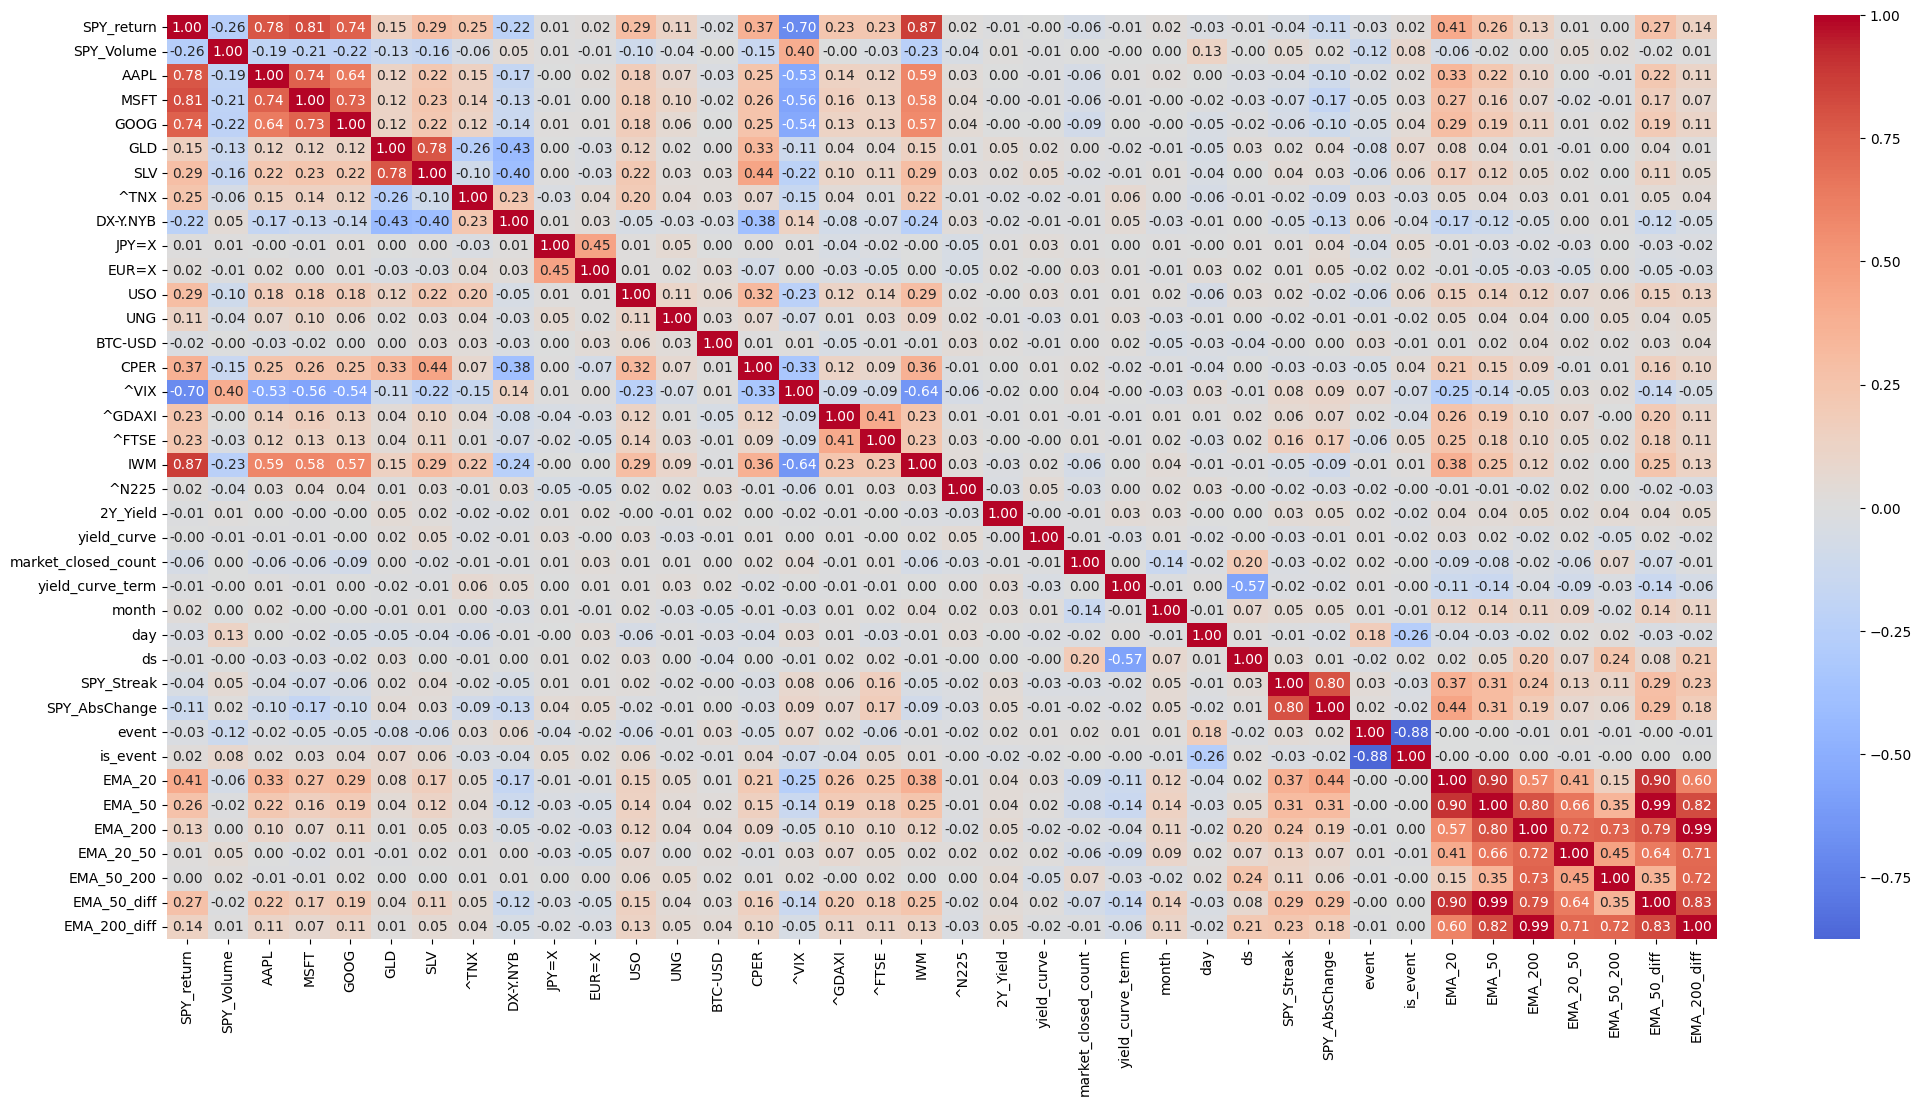

In [199]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 12))
sns.heatmap(df_season.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.show()


In [201]:
x_c = df_season.drop(['SPY_return','ds'], axis=1)
cols = x_c.select_dtypes('float64').columns.to_list()
x_c = x_c[cols]
x_c.info()
y_c = df_season['SPY_return']



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SPY_Volume        1315 non-null   float64
 1   AAPL              1315 non-null   float64
 2   MSFT              1315 non-null   float64
 3   GOOG              1315 non-null   float64
 4   GLD               1315 non-null   float64
 5   SLV               1315 non-null   float64
 6   ^TNX              1315 non-null   float64
 7   DX-Y.NYB          1315 non-null   float64
 8   JPY=X             1315 non-null   float64
 9   EUR=X             1315 non-null   float64
 10  USO               1315 non-null   float64
 11  UNG               1315 non-null   float64
 12  BTC-USD           1315 non-null   float64
 13  CPER              1315 non-null   float64
 14  ^VIX              1315 non-null   float64
 15  ^GDAXI            1315 non-null   float64
 16  ^FTSE             1315 non-null   float64


In [203]:
# Step 1: Calculate correlation of each feature with y
correlations = x_c.corrwith(y_c)

# Step 2: Filter features based on the condition
mask = (correlations > 0.7) | (correlations < -0.15)
filtered_x = x_c.loc[:, mask]

# Optional: See what was kept
selected_corr_features = correlations[mask]
print("Selected features based on correlation threshold:")
print(selected_corr_features.sort_values())


Selected features based on correlation threshold:
^VIX         -0.698509
SPY_Volume   -0.259173
DX-Y.NYB     -0.216724
GOOG          0.740372
AAPL          0.781695
MSFT          0.814388
IWM           0.866553
dtype: float64


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\numpy\lib\_function_base_impl.py:2888: RuntimeWarning: invalid value encountered in subtract


# Grid search

In [205]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, make_scorer

In [312]:
# Param grids
rf_param_grid = {
    'n_estimators': [150,200,300],
    'max_features': [ None,'sqrt', 'log2',1.0],
    'max_depth': [None ,20, 30, 40, 70],
    'min_samples_split': [1,2,5,8],
    'min_samples_leaf': [1,2, 4, 8]
}

xgb_param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [2,5,8,12],
    'learning_rate': [0.01, 0.05, 0.1,0.12,0.15],
    'subsample': [0.8, 1],
    'mean_samples_leaf': [1, 2, 4]
}

In [226]:


# Create custom scorer to minimize MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# TimeSeriesSplit (e.g., 5 splits)
tscv = TimeSeriesSplit(n_splits=5)



# Fit Random Forest
rf_grid = GridSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                       param_grid=rf_param_grid,
                       cv=tscv,
                       scoring=mae_scorer,
                       verbose=1)

rf_grid.fit(x_train_ind, y_train_ind)

best_rf = rf_grid.best_estimator_



# Evaluate
rf_mae = mean_absolute_error(y_test_ind, best_rf.predict(x_test_ind))


print(f"✅ Best RF MAE: {rf_mae:.4f} → Params: {rf_grid.best_params_}")



Fitting 5 folds for each of 960 candidates, totalling 4800 fits


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1200 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    v

✅ Best RF MAE: 0.2309 → Params: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


# Grid with wights

In [ ]:
# Recreate sample weights using best_w
num_samples = len(y_train_ind2)
weights = np.linspace(1, best, num_samples)
weights = weights / np.mean(weights)  # Normalize to mean=1

# TimeSeriesSplit (e.g., 5 splits)
tscv = TimeSeriesSplit(n_splits=5)


# Fit XGBoost
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1, random_state=42, verbosity=0),
                        param_grid=xgb_param_grid,
                        cv=tscv,
                        scoring=mae_scorer,
                        verbose=1)

xgb_grid.fit(x_train_ind2, y_train_ind2,sample_weight=weights )
best_xgb = xgb_grid.best_estimator_
# Evaluate
xgb_mae = mean_absolute_error(y_test_ind2, best_xgb.predict(x_test_ind2))

print(f"✅ Best XGB MAE: {xgb_mae:.4f} → Params: {xgb_grid.best_params_}")

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
✅ Best XGB MAE: 0.2191 → Params: {'learning_rate': 0.05, 'max_depth': 5, 'mean_samples_leaf': 1, 'n_estimators': 100, 'subsample': 0.8}


# XGBoost for wights and hyper parameters

In [318]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error

# Define candidate weight scalings to search over
w_candidates = np.arange(1.0, 3.1, 0.2)  # Try from 1.0 to 3.0 in steps of 0.2

best_mae = float('inf')
best_xgb_model = None
best_w = None
best_params = None

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

for w in w_candidates:
    print(f"\n🔍 Testing weight slope: {w:.2f}")
    
    # Create weights linearly increasing from 1 to w
    num_samples = len(y_train_ind2)
    weights = np.linspace(1, w, num_samples)
    weights = weights / np.mean(weights)  # Normalize to mean=1

    # Grid search
    xgb_grid = GridSearchCV(
        XGBRegressor(n_jobs=-1, random_state=42, verbosity=0),
        param_grid=xgb_param_grid,
        cv=tscv,
        scoring=mae_scorer,
        verbose=0
    )

    xgb_grid.fit(x_train_ind2, y_train_ind2, sample_weight=weights)
    model = xgb_grid.best_estimator_

    # Evaluate on test set
    preds = model.predict(x_test_ind2)
    mae = mean_absolute_error(y_test_ind2, preds)
    print(f"→ MAE: {mae:.4f} | Best Params: {xgb_grid.best_params_}")

    if mae < best_mae:
        best_mae = mae
        best_xgb_model = model
        best_w = w
        best_params = xgb_grid.best_params_

# 🎉 Final result
print(f"\n✅ Best XGBoost Model")
print(f"MAE: {best_mae:.4f}")
print(f"Weight slope (w): {best_w}")
print(f"Hyperparameters: {best_params}")



🔍 Testing weight slope: 1.00
→ MAE: 0.2229 | Best Params: {'learning_rate': 0.01, 'max_depth': 5, 'mean_samples_leaf': 1, 'n_estimators': 300, 'subsample': 0.8}

🔍 Testing weight slope: 1.20
→ MAE: 0.2190 | Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'mean_samples_leaf': 1, 'n_estimators': 100, 'subsample': 0.8}

🔍 Testing weight slope: 1.40
→ MAE: 0.2116 | Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'mean_samples_leaf': 1, 'n_estimators': 100, 'subsample': 0.8}

🔍 Testing weight slope: 1.60
→ MAE: 0.2132 | Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'mean_samples_leaf': 1, 'n_estimators': 100, 'subsample': 0.8}

🔍 Testing weight slope: 1.80
→ MAE: 0.2123 | Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'mean_samples_leaf': 1, 'n_estimators': 100, 'subsample': 0.8}

🔍 Testing weight slope: 2.00
→ MAE: 0.2083 | Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'mean_samples_leaf': 1, 'n_estimators': 100, 'subsample': 0.8}

🔍 Testing weight slope: 2.2

# Adding weights to xgboost

In [ ]:


# Parameters
best_w = None
best_mae = float('inf')

num_samples = len(y_train)
results = []

# Test weight range from 1.0 to 3.0 in 0.1 steps
for w in np.arange(1.0, 3.1, 0.1):
    # Create sample weights linearly increasing from 1 to w
    weights = np.linspace(1, w, num_samples)
    weights = weights / np.mean(weights)  # Normalize to mean=1

    # Fit XGBoost with weights
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, n_jobs=-1)
    model.fit(x_train, y_train, sample_weight=weights)

    # Predict and evaluate on test set
    predictions = model.predict(x_test)
    mae = mean_absolute_error(y_test, predictions)

    results.append((w, mae))
    print(f"w={w:.1f}, MAE={mae:.4f}")

    # Track best
    if mae < best_mae:
        best_mae = mae
        best_w = w

print(f"\n✅ Best weight slope w={best_w:.2f} with MAE={best_mae:.4f}")
